## Import necessary libraries

Our analysis we will consider the ratio of players in the best 11 as follows:

1.  3 Batters
2.  3 Allrounders
3.  4 Bowlers
4.  1 Wicket Keeper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the maximum number of columns to display in the output without truncation
pd.set_option('display.max_columns', None)

# Set the maximum number of rows to display in the output without truncation
pd.set_option('display.max_rows', None)

# Set the maximum width of the display to fit the entire DataFrame without wrapping
pd.set_option('display.width', None)

# Disable column width restriction to display the entire contents of each cell
pd.set_option('display.max_colwidth', None)
    
    
data = pd.read_csv("IPLDataset.csv")
data

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.630,126.60,4.0,16.50,8.250,12.00,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.670,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.940,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.690,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.850,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Robin Uthappa,Chenai,Indian,Batter,1,193.0,4722.0,27.940,130.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jason Roy,Gujarat,Overseas,Batter,1,13.0,329.0,29.910,129.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Devdutt Padikkal,Rajasthan,Indian,Batter,1,29.0,884.0,31.570,125.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Priyam Garg,Hyderabad,Indian,Batter,1,19.0,205.0,14.640,110.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Abhinav Sadarangani,Gujarat,Indian,Batter,0,4.0,162.0,54.000,150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.isna().sum() 

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [6]:
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


### Cleaning the Data

In [7]:
# Filter rows in the 'data' DataFrame where the 'Player_Type' column is 'Batter'
batters = data.loc[(data["Player_Type"] == "Batter")]

# Further filter 'batters' DataFrame to include only capped players (Capped == 1)
batters_new = batters.loc[batters["Capped"] == 1]

# Create a new DataFrame 'capped_batters' with selected columns for display
capped_batters = batters_new[[ 
    'Player Name',
    'Team',
    'Nationality',
    'Matches_Played',
    'Runs',
    'Average',
    'Strike_Rate'
]]

# Display the DataFrame showing details of capped batters
capped_batters


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17
5,Robin Uthappa,Chenai,Indian,193.0,4722.0,27.94,130.15
6,Jason Roy,Gujarat,Overseas,13.0,329.0,29.91,129.02
7,Devdutt Padikkal,Rajasthan,Indian,29.0,884.0,31.57,125.05
8,Priyam Garg,Hyderabad,Indian,19.0,205.0,14.64,110.81
12,Rahul Tripathi,Hyderabad,Indian,62.0,1385.0,26.13,136.32


To specify column name as "Bowler" it must be mentioned as "Bowler "
to see all the values in a dataframe 

In [8]:
# Filter rows in the 'data' DataFrame where the 'Player_Type' column is 'Bowler'
bowlers = data.loc[(data["Player_Type"] == "Bowler ")]

# Further filter 'bowlers' DataFrame to include only capped players (Capped == 1)
bowlers_new = bowlers.loc[bowlers["Capped"] == 1]

# Create a new DataFrame 'capped_bowlers' with selected columns for display
capped_bowlers = bowlers_new[[
    'Player Name',
    'Team',
    'Nationality',
    'Matches_Played',
    'Wickets',
    'Bowling_average',
    'Economy',
    'Bowling_Strike_Rate'
]]

# Display the DataFrame showing details of capped bowlers
capped_bowlers


,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
37,Trent Boult,Rajasthan,Overseas,62.0,76.0,26.09,8.40,18.64
38,Mohammad Shami,Gujarat,Indian,77.0,79.0,30.41,8.63,21.14
39,T Natarajan,Hyderabad,Indian,24.0,20.0,34.40,8.24,25.05
40,Deepak Chahar,Chennai,Indian,63.0,59.0,29.19,7.80,22.44
41,Prasidh Krishna,Rajasthan,Indian,34.0,30.0,38.40,9.27,24.87
42,Lockei Ferguson,Gujarat,Overseas,22.0,24.0,27.00,8.12,19.96
43,Josh Hazlewood,Bangalore,Overseas,12.0,12.0,29.75,7.93,22.50
45,Bhuvneshwar Kumar,Hyderabad,Indian,132.0,142.0,25.27,7.30,20.77
46,Shardul Thakur,Delhi,Indian,61.0,67.0,27.87,8.89,18.81


In [9]:
# Filter rows in the 'data' DataFrame where the 'Player_Type' column is 'Allrounder'
allrounders = data.loc[(data["Player_Type"] == "Allrounder")]

# Further filter 'allrounders' DataFrame to include only capped players (Capped == 1)
new_allrounders = allrounders.loc[allrounders["Capped"] == 1]

# Create a new DataFrame 'capped_allrounders' with selected columns for display
capped_allrounders = new_allrounders[[
    "Player Name",
    "Team",
    "Nationality",
    "Matches_Played",
    "Runs",
    "Average",
    "Strike_Rate",
    "Wickets",
    "Bowling_average",
    "Economy",
    "Bowling_Strike_Rate"
]]

# Display the DataFrame showing details of capped all-rounders
capped_allrounders


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.120,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.750,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.940,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.000,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.540,121.15,35.0,22.46,8.20,16.43
132,Harshal Patel,Bangalore,Indian,63.0,187.0,11.000,134.53,78.0,23.18,8.58,16.21
133,Deepak Hooda,Lucknow,Indian,80.0,785.0,16.700,129.54,9.0,50.89,8.46,36.11
135,Washington Sundar,Hyderabad,Indian,42.0,217.0,14.470,111.28,27.0,32.11,6.94,27.78
136,Krunal Pandya,Lucknow,Indian,84.0,1143.0,22.410,138.55,51.0,34.76,7.37,28.31
137,Mitchell Marsh,Delhi,Overseas,21.0,225.0,17.310,114.21,20.0,21.00,7.90,15.95


In [10]:
# Filter rows in the 'data' DataFrame where the 'Player_Type' column is 'Keeper'
keepers = data.loc[data["Player_Type"]=="Keeper"]

# Further filter 'keepers' DataFrame to include only capped players (Capped == 1)
new_keepers = keepers.loc[(keepers["Capped"]== 1)]

# Create a new DataFrame 'capped_keepers' with selected columns for display
capped_keepers = new_keepers[[
    'Player Name',
    'Team',
    'Nationality',
    'Matches_Played',
    "Runs",
    "Average",
    "Strike_Rate",
    "Catches",
    "Run_outs",
    "Stumps"
]]

# Display the DataFrame showing details of capped keepers
capped_keepers


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,606.0,22.40,155.00,11.0,3.0,0.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
112,Anuj Rawat,Bangalore,Indian,1.0,0.0,0.00,0.00,3.0,0.0,0.0
113,Prabhsimran Singh,Punjab,Indian,5.0,50.0,10.00,90.90,2.0,0.0,0.0
114,Sheldon Jackson,Kolkata,Overseas,4.0,38.0,19.00,122.60,2.0,0.0,0.0


### Cleaning the data removing the null values or Nan to 0

In [11]:
# Fill NaN values in the 'capped_batters' DataFrame with 0
capped_batters = capped_batters.fillna(0)
# Fill NaN values in the 'capped_bowlers' DataFrame with 0
capped_allrounders = capped_allrounders.fillna(0)
# Fill NaN values in the 'capped_keepers' DataFrame with 0
capped_keepers = capped_keepers.fillna(0)

In [12]:
# Print the count of NaN values in each column of the 'capped_batters' DataFrame
print(capped_batters.isna().sum())
# Print the count of NaN values in each column of the 'capped_bowlers' DataFrame
print(capped_allrounders.isna().sum())
# Print the count of NaN values in each column of the 'capped_keepers' DataFrame
print(capped_keepers.isna().sum())


Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   0
Average                0
Strike_Rate            0
Wickets                0
Bowling_average        0
Economy                0
Bowling_Strike_Rate    0
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           0
Run_outs          0
Stumps            0
dtype: int64


In [13]:
# Filtering top batters based on a minimum average of 32.0
top_batters = capped_batters.loc[capped_batters["Average"] >= 32.0]

# Sorting top batters by batting average in descending order
top_batters_avg = top_batters.sort_values("Average", ascending=False)

# Sorting top batters by total runs scored in descending order
top_batters_runs = top_batters.sort_values("Runs", ascending=False)

# Sorting top batters by strike rate in descending order
top_batters_sr = top_batters.sort_values("Strike_Rate", ascending=False)

# Sorting top batters by total matches played in descending order
top_batters_matches = top_batters.sort_values("Matches_Played", ascending=False)



In [14]:

top_batters

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [15]:
# Filtering top bowlers based on a maximum bowling average of 24.0
top_bowlers = capped_bowlers.loc[capped_bowlers["Bowling_average"] <= 24.0]

# Sorting top bowlers by bowling strike rate in ascending order
top_bowlers_b_sr = top_bowlers.sort_values("Bowling_Strike_Rate")

# Sorting top bowlers by total wickets taken in descending order
top_bowlers_wickets = top_bowlers.sort_values("Wickets", ascending=False)

# Sorting top bowlers by total matches played in descending order
top_bowlers_matches = top_bowlers.sort_values("Matches_Played", ascending=False)


In [16]:
top_bowlers_wickets.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50


In [17]:
top_bowlers_b_sr

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
88,Alzarri Joseph,Gujarat,Overseas,3.0,6.0,14.50,10.04,8.67
93,Lungi Ngidi,Delhi,Overseas,14.0,25.0,17.92,8.30,12.96
36,Kagiso Rabada,Punjab,Overseas,50.0,76.0,20.53,8.21,15.00
210,Arshdeep Singh,Punjab,Indian,23.0,30.0,22.30,8.78,15.23
234,Anrich Nortje,Delhi,Overseas,24.0,34.0,20.56,7.65,16.12
103,Nathan Coulter-Nile,Rajasthan,Overseas,38.0,48.0,21.92,7.52,17.48
50,Yuzvendra Chahal,Rajasthan,Indian,114.0,139.0,22.28,7.59,17.61
215,Jasprit Bumrah,Mumbai,Indian,106.0,130.0,23.05,7.42,18.63
214,Varun Chakravarthy,Kolkata,Indian,31.0,36.0,23.31,6.82,20.50


In [18]:
# Filtering top all-rounders based on a minimum batting average of 25.0
top_allrounders = capped_allrounders.loc[capped_allrounders["Average"] >= 25.0]

# Filtering top all-rounders based on a minimum wickets taken of 70
top_allrounders_wickets = capped_allrounders.loc[capped_allrounders['Wickets'] >= 70]

# Sorting top all-rounders by total matches played in descending order
top_allrounders_Matches_Played = capped_allrounders.sort_values("Matches_Played", ascending=False)

# Sorting top all-rounders by bowling average in ascending order
top_allrounders_b_avg = capped_allrounders.sort_values("Bowling_average", ascending=True)

# Sorting top all-rounders by total runs scored in descending order
top_allrounders_runs = capped_allrounders.sort_values("Runs", ascending=False)

# Sorting top all-rounders by strike rate in descending order
top_allrounders_sr = capped_allrounders.sort_values("Strike_Rate", ascending=False)

# Sorting top all-rounders by economy in ascending order
top_allrounders_economy = capped_allrounders.sort_values("Economy")

# Sorting top all-rounders by bowling strike rate in descending order
top_allrounders_b_sr = capped_allrounders.sort_values("Bowling_Strike_Rate", ascending=False)



In [19]:
top_allrounders_b_sr

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
200,Fabian Allen,Mumbai,Overseas,4.0,6.0,6.000,50.00,1.0,90.00,8.18,66.00
186,Nathan Ellis,Punjab,Overseas,3.0,18.0,18.000,112.50,1.0,90.00,8.80,66.00
159,Mahipal Lomror,Bangalore,Indian,11.0,181.0,22.620,119.87,1.0,74.00,7.48,60.00
149,Jayanth Yadav,Gujarat,Indian,19.0,40.0,10.000,111.11,8.0,52.38,6.87,45.75
138,Riyan Parag,Rajasthan,Indian,30.0,339.0,16.950,118.53,3.0,73.67,9.97,44.33
168,Sherfane Rutherford,Bangalore,Overseas,7.0,73.0,14.600,135.19,1.0,59.00,8.63,41.00
145,Harpreet Brar,Punjab,Indian,10.0,84.0,0.000,120.00,5.0,45.50,7.12,38.40
133,Deepak Hooda,Lucknow,Indian,80.0,785.0,16.700,129.54,9.0,50.89,8.46,36.11
144,Kamlesh Nagarkoti,Delhi,Indian,11.0,22.0,5.500,66.67,5.0,51.20,9.14,33.60
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.310,169.09,13.0,43.23,8.26,31.38


In [20]:
top_allrounders_wickets


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.120,109.88,145.0,27.80,6.91,24.12
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.940,130.25,167.0,24.32,8.36,17.44
132,Harshal Patel,Bangalore,Indian,63.0,187.0,11.000,134.53,78.0,23.18,8.58,16.21
203,Ravindra Jadeja,Chennai,Indian,200.0,2386.0,27.110,128.14,127.0,30.05,7.61,23.68
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
221,Rashid Khan,Gujarat,Overseas,76.0,222.0,9.255,137.04,93.0,20.56,6.33,19.48
226,Axar Patel,Delhi,Indian,109.0,953.0,17.300,125.33,95.0,29.07,7.22,24.16
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.640,161.69,143.0,24.53,6.74,21.83


In [21]:
top_allrounders_sr

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.310,178.57,72.0,26.40,9.05,17.51
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.310,169.09,13.0,43.23,8.26,31.38
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.640,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.000,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.330,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.230,151.84,22.0,41.59,8.55,29.18
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.000,151.26,13.0,31.38,7.14,26.38
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.980,149.77,65.0,31.62,8.78,21.60
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.300,148.10,0.0,0.00,7.00,0.00
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.970,146.37,16.0,29.31,6.85,25.69


In [22]:
# Filtering top keepers based on a minimum batting average of 25.0
top_keepers = capped_keepers.loc[(capped_keepers["Average"] >= 25.0)]

# Sorting top keepers by batting average in descending order
top_keepers_avg = top_keepers.sort_values("Average", ascending=False)

# Sorting top keepers by strike rate in descending order
top_kepers_sr = top_keepers.sort_values("Strike_Rate", ascending=False)

# Sorting top keepers by total runs scored in descending order
top_keepers_runs = top_keepers.sort_values("Runs", ascending=False)

# Sorting top keepers by total catches taken in descending order
top_keepers_catches = top_keepers.sort_values("Catches", ascending=False)

# Sorting top keepers by total run-outs affected in descending order
top_keepers_runouts = top_keepers.sort_values("Run_outs", ascending=False)

# Sorting top keepers by total stumpings in descending order
top_keepers_stumps = top_keepers.sort_values("Stumps", ascending=False)

 

In [23]:
top_keepers_runouts

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [24]:
top_keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


In [25]:
top_keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0


In [26]:
top_keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0


### Visualization of  Batters 

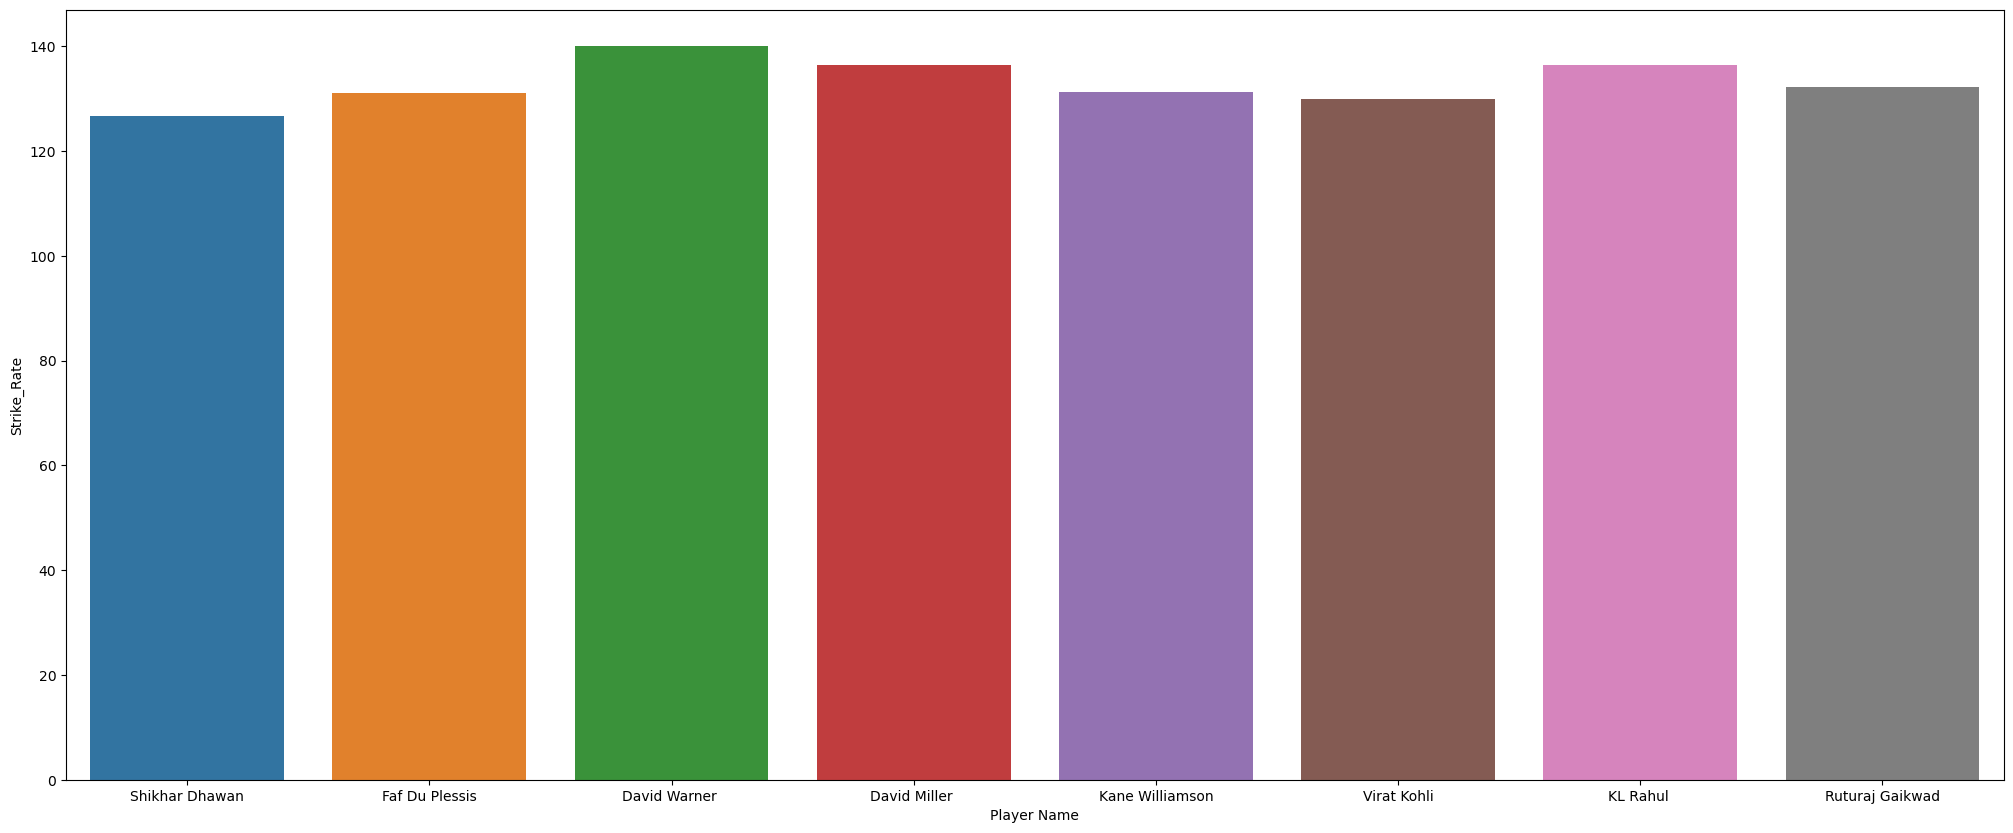

In [27]:
plt.figure(figsize =(25,10))
sns.barplot(x ="Player Name", y = "Strike_Rate" ,data = top_batters.head(13))
plt.show()

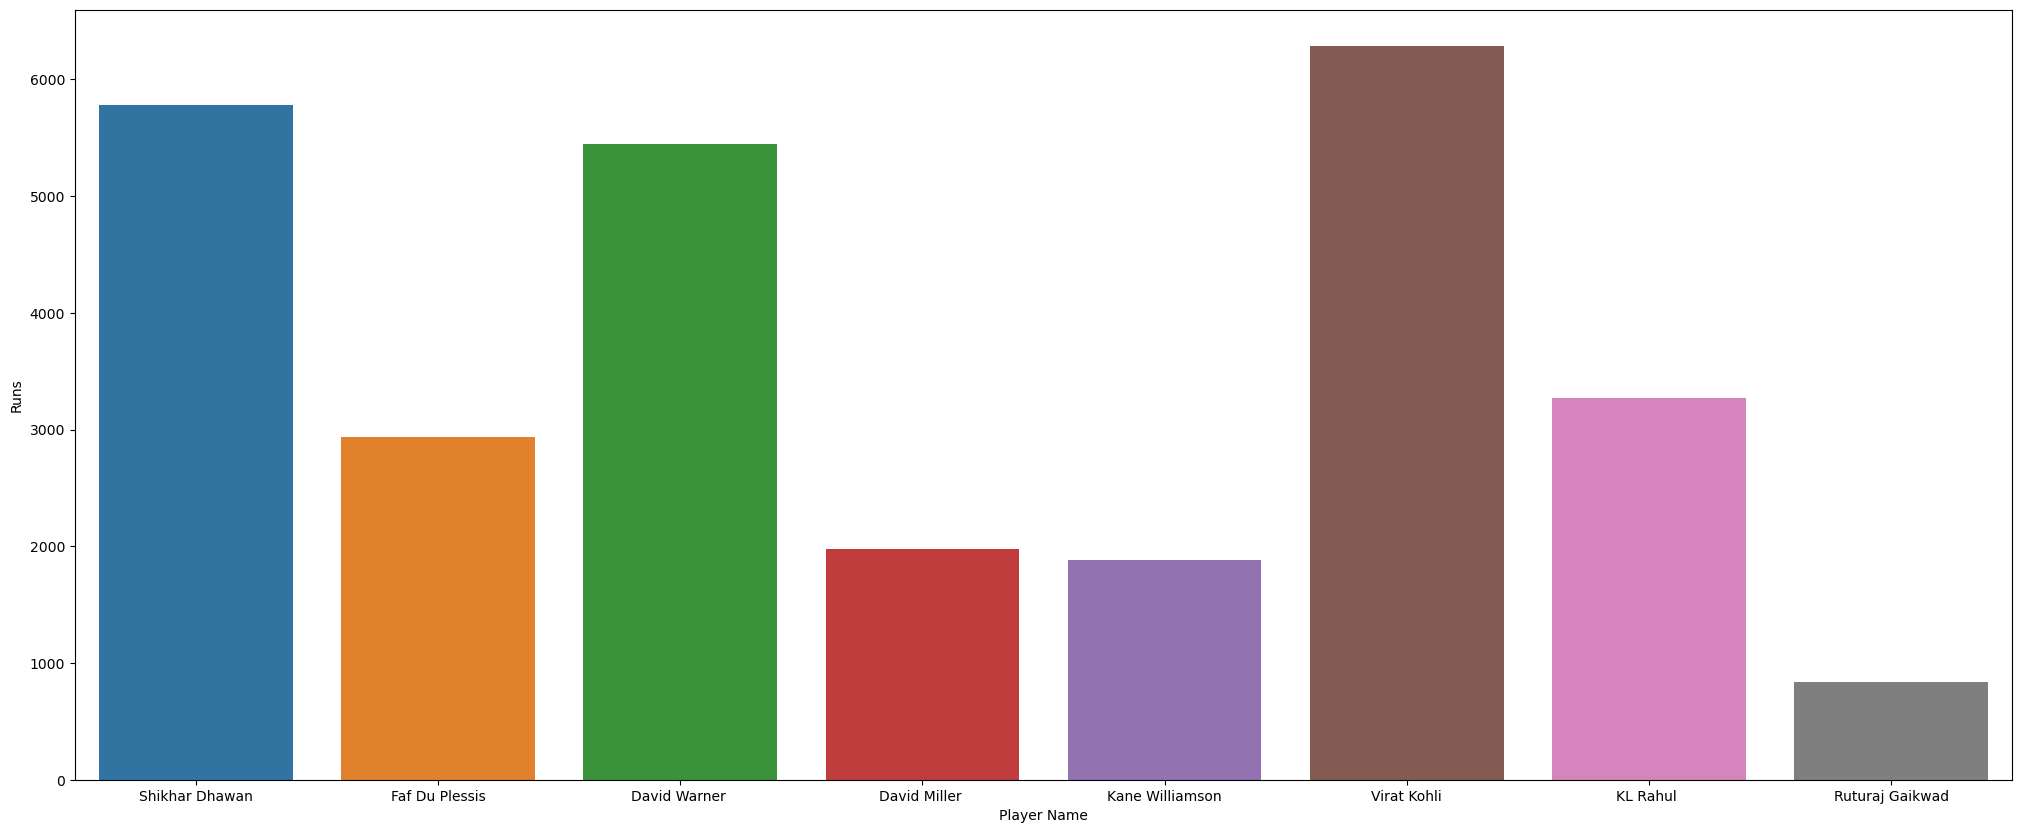

In [28]:
plt.figure(figsize = (25,10))
sns.barplot(x = "Player Name" , y = "Runs" ,data= top_batters.head(13))
plt.show()

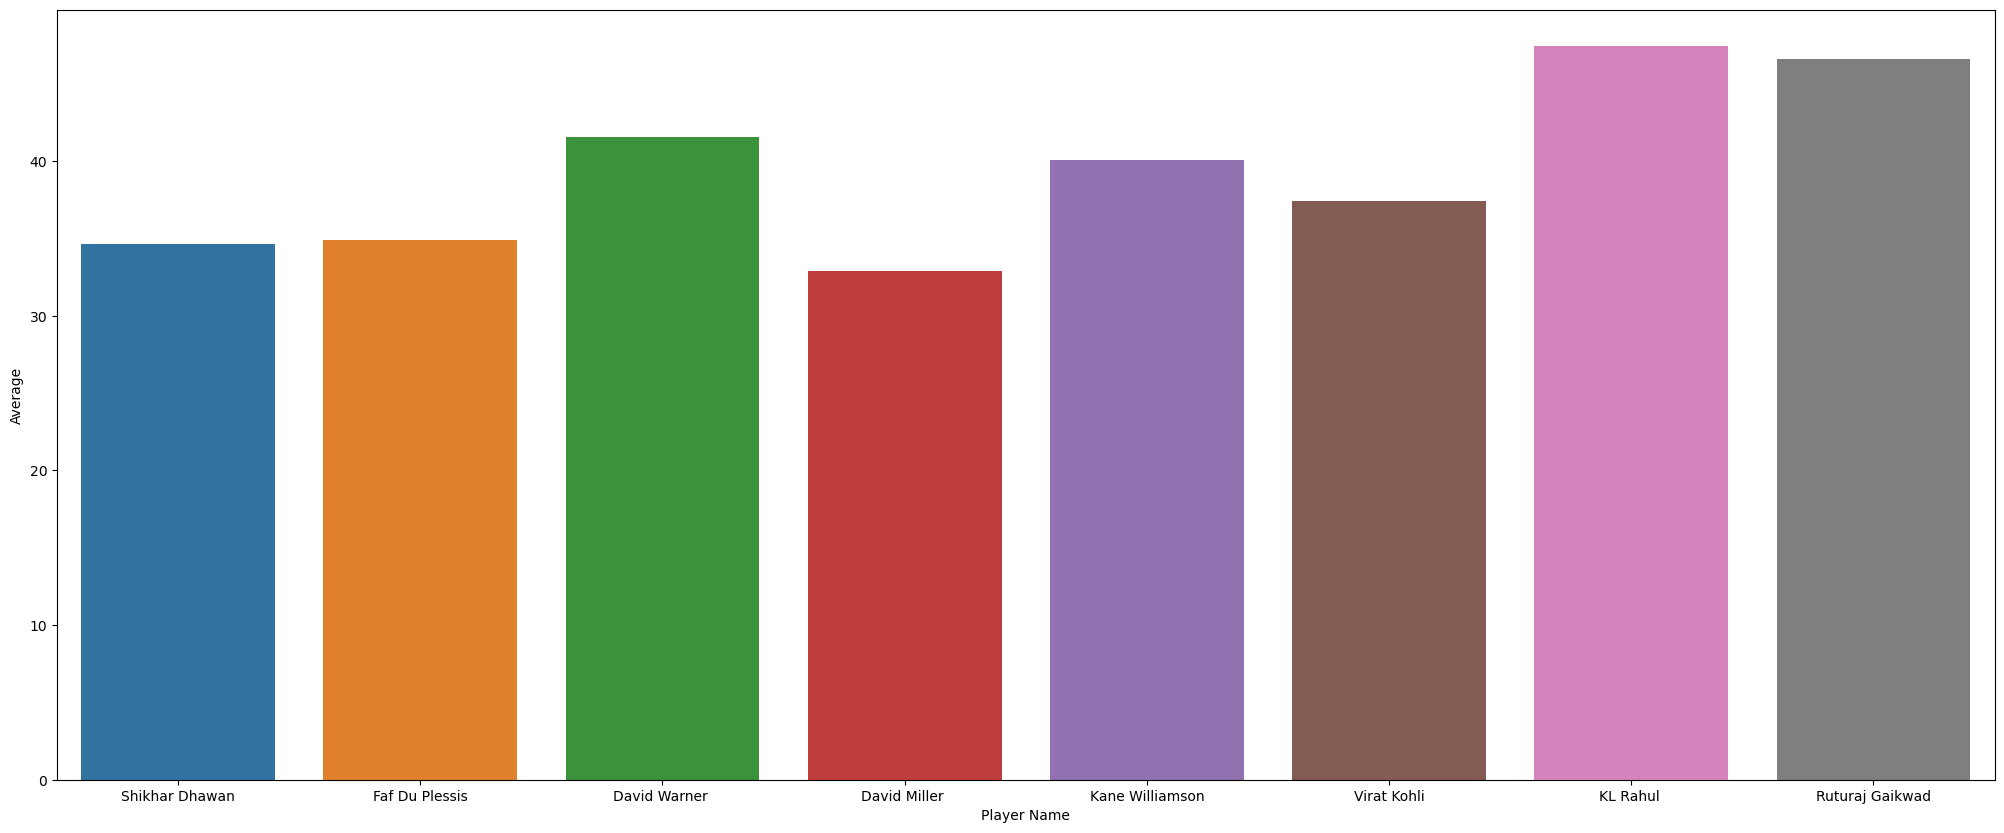

In [29]:
plt.figure(figsize=(25,10))
sns.barplot(x="Player Name", y = "Average" , data= top_batters.head(13) )
plt.show()

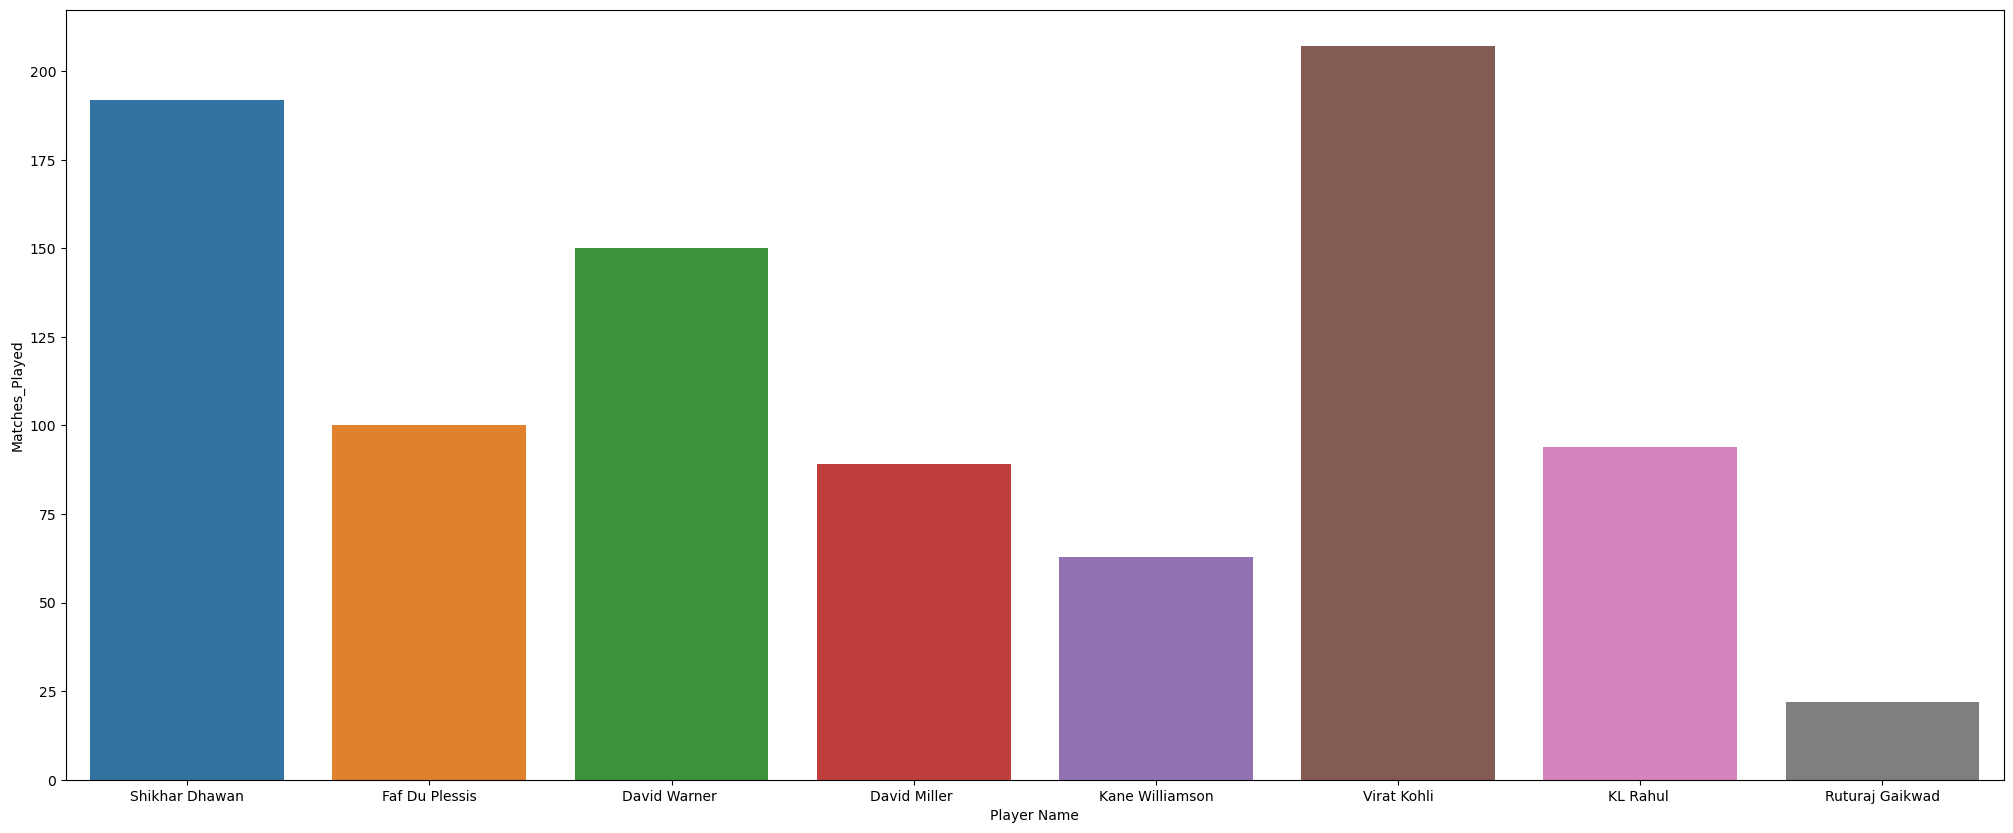

In [30]:
plt.figure(figsize =(25,10))
sns.barplot(x ="Player Name", y ="Matches_Played" ,data= top_batters.head(13))
plt.show()

### Visualization of Bowlers

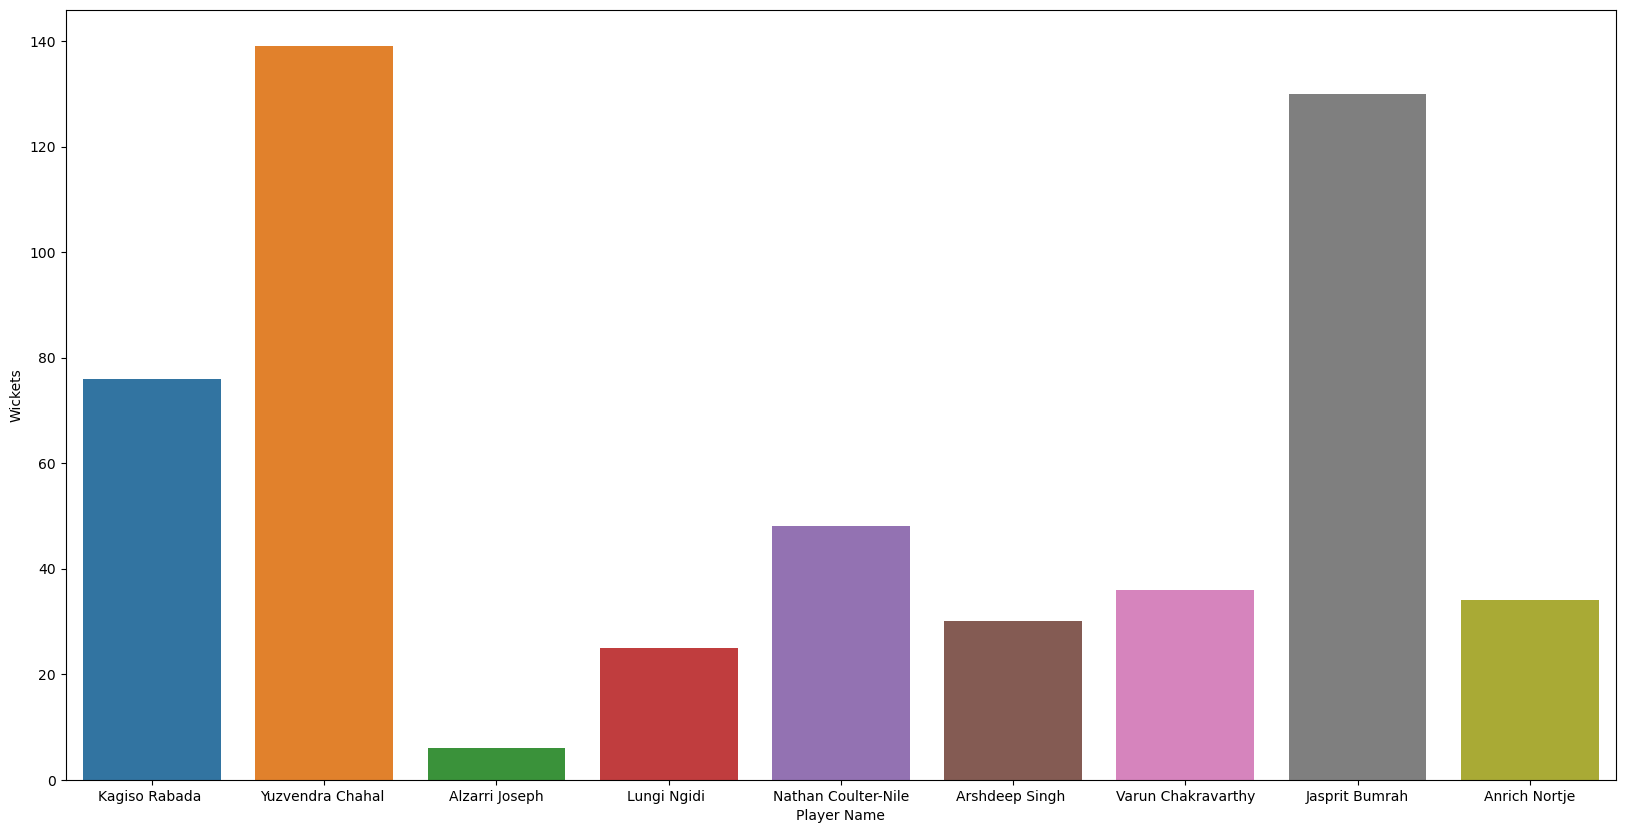

In [31]:
plt.figure(figsize =(20,10) )
sns.barplot(x= "Player Name", y ="Wickets", data = top_bowlers )
plt.show()

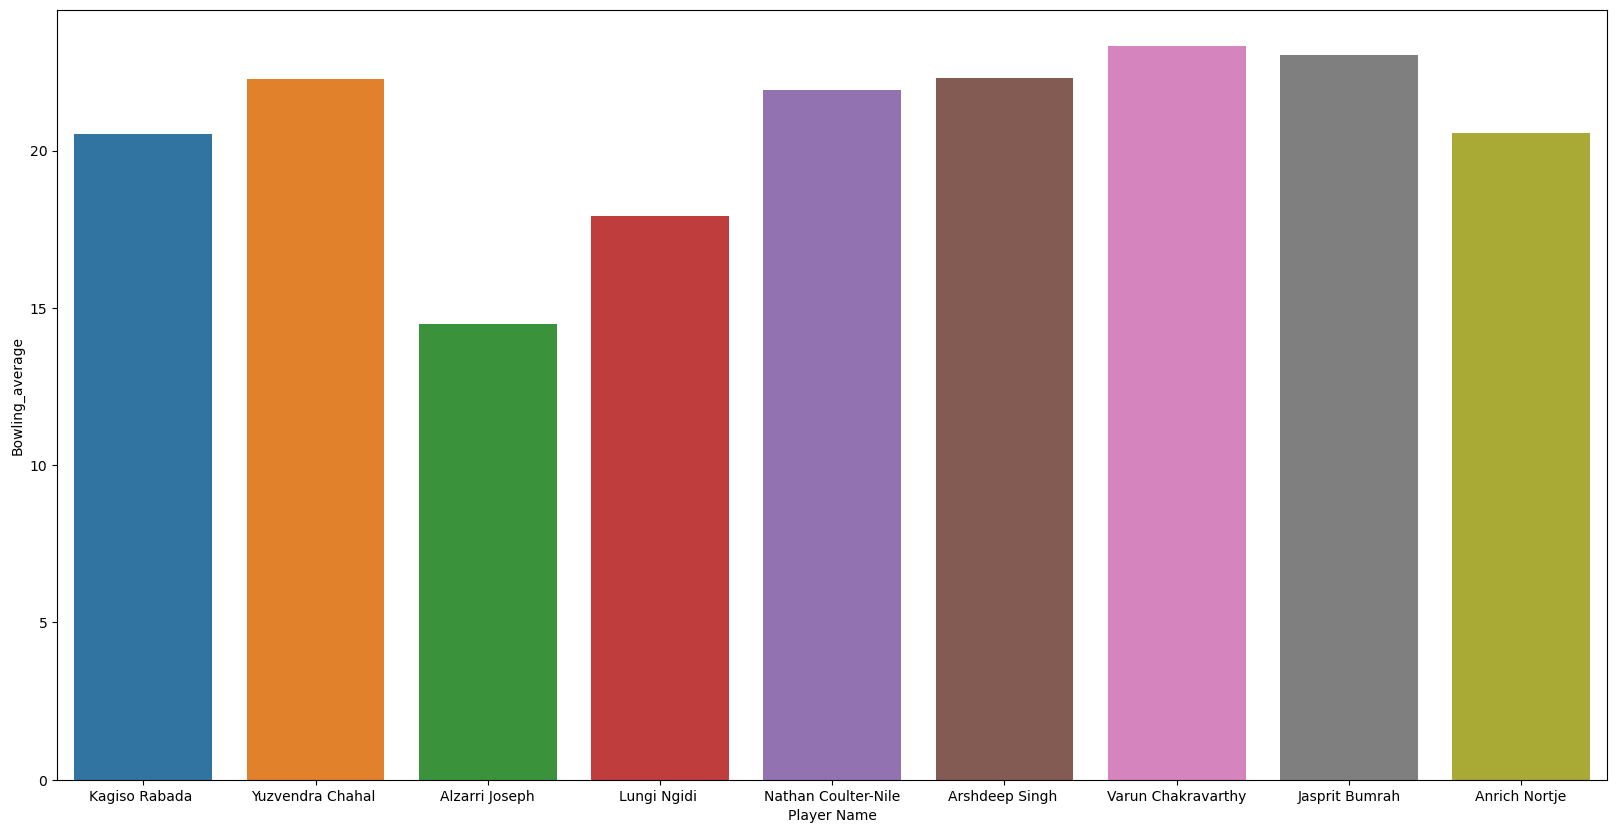

In [32]:
plt.figure(figsize =(20,10) )
sns.barplot(x = "Player Name", y ="Bowling_average", data = top_bowlers)
plt.show()

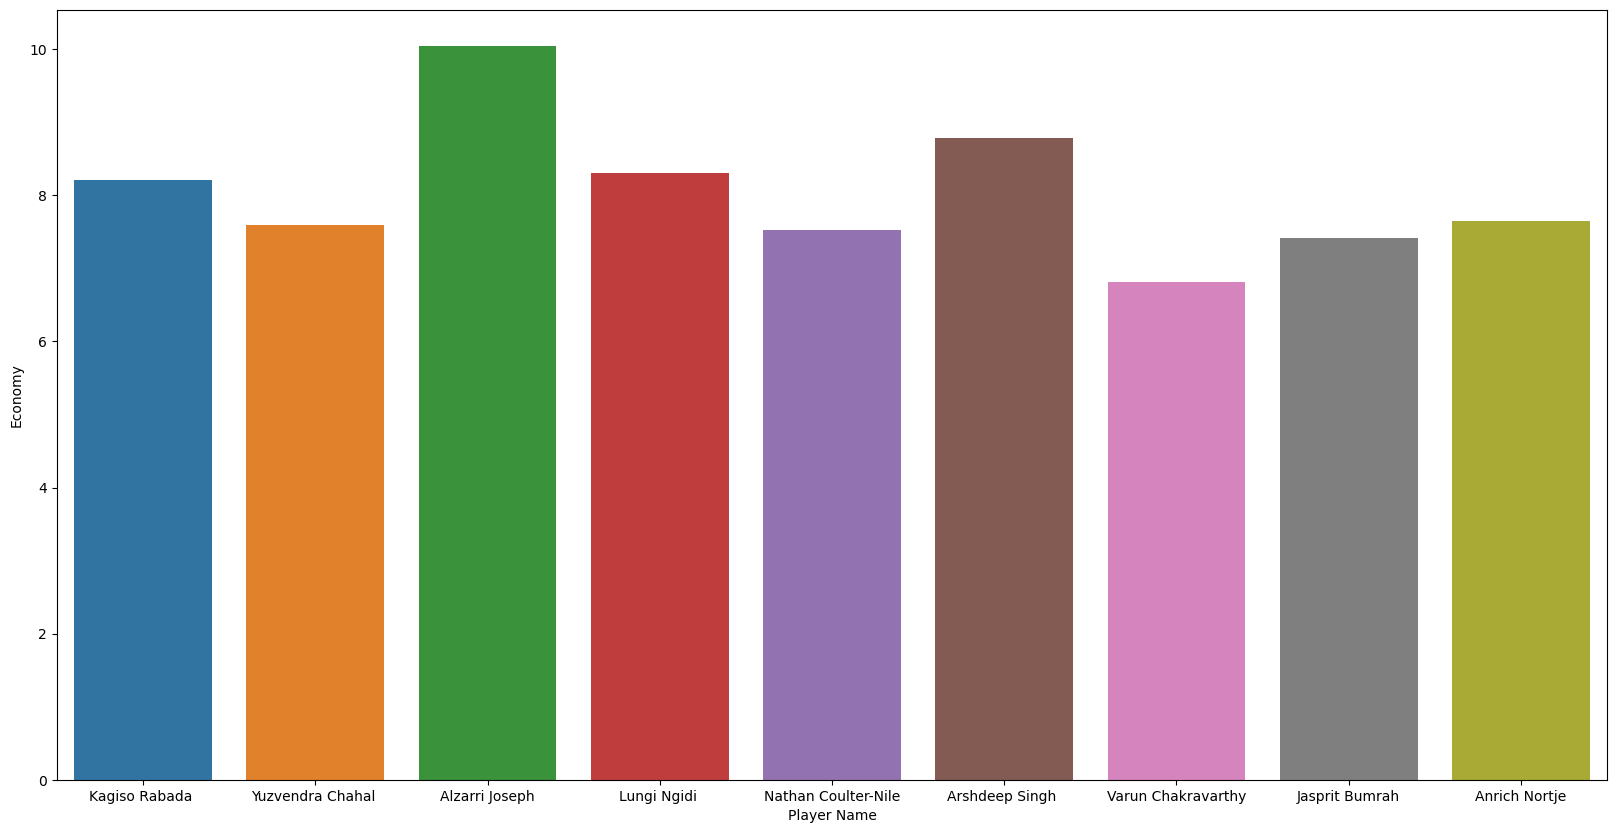

In [33]:
plt.figure(figsize =(20,10) )
sns.barplot(x ="Player Name" ,y= "Economy",data = top_bowlers)
plt.show()

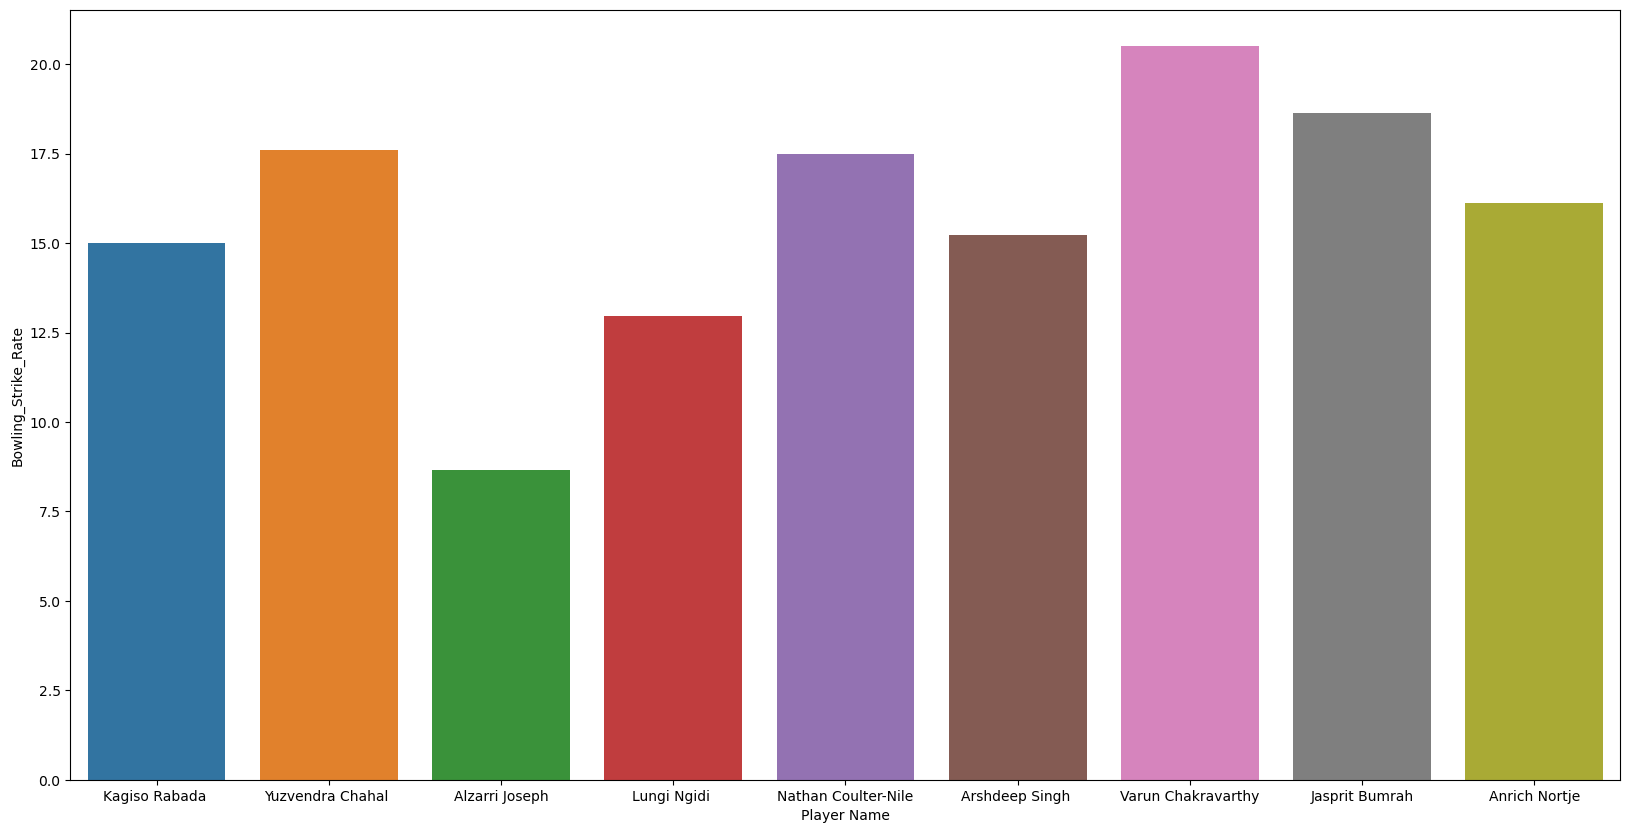

In [34]:
plt.figure(figsize =(20,10) )
sns.barplot(x ="Player Name" ,y= "Bowling_Strike_Rate",data = top_bowlers)
plt.show()

### Visualization of Allrounders

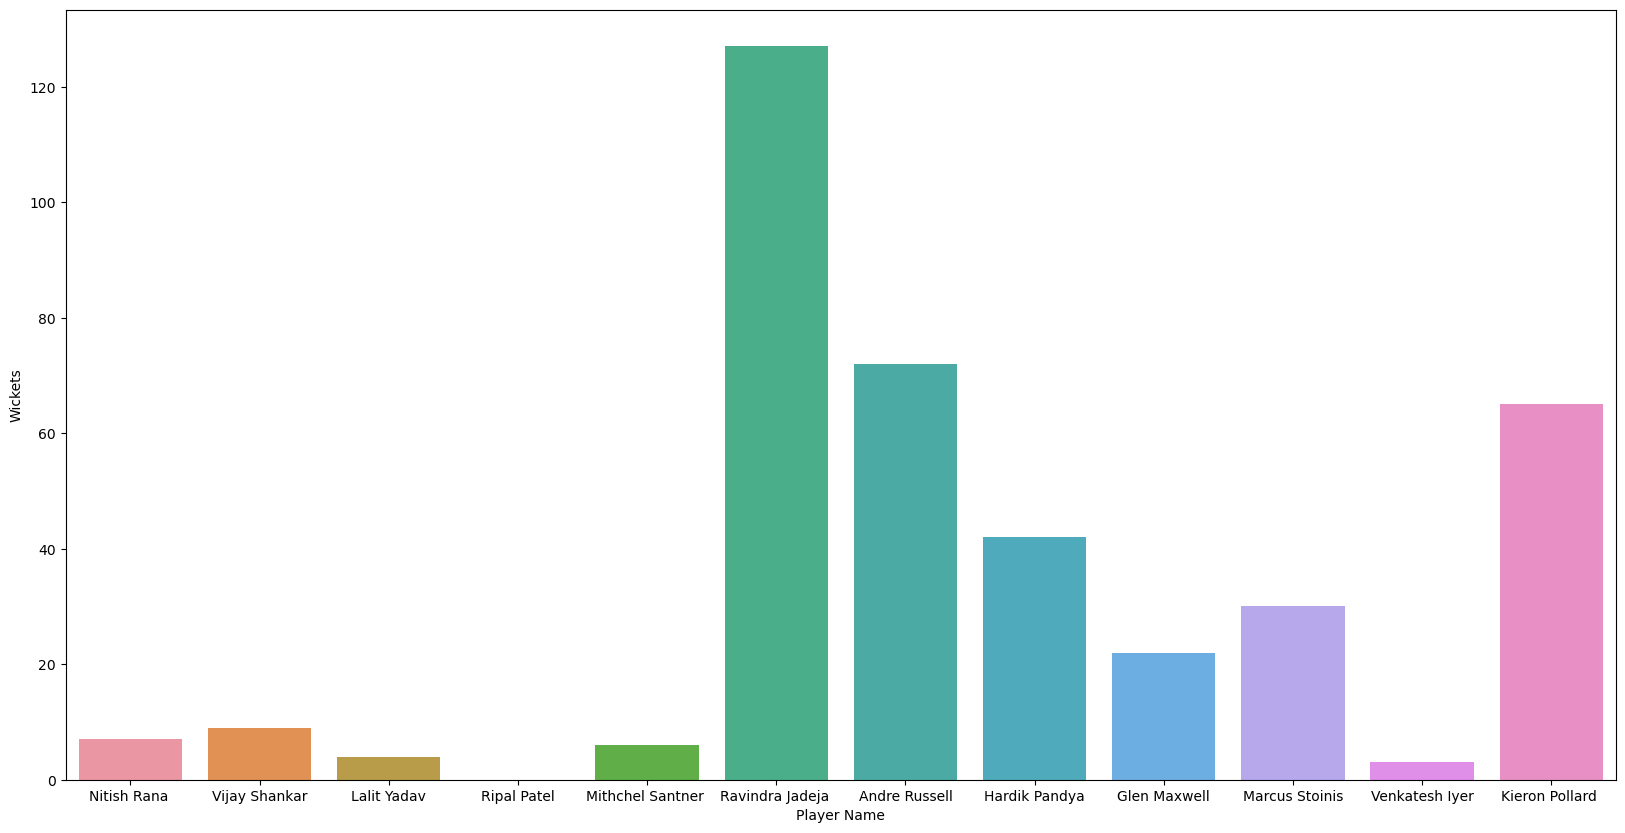

In [35]:
plt.figure(figsize =(20,10) )
sns.barplot(x ="Player Name" ,y = "Wickets" , data = top_allrounders )
plt.show()

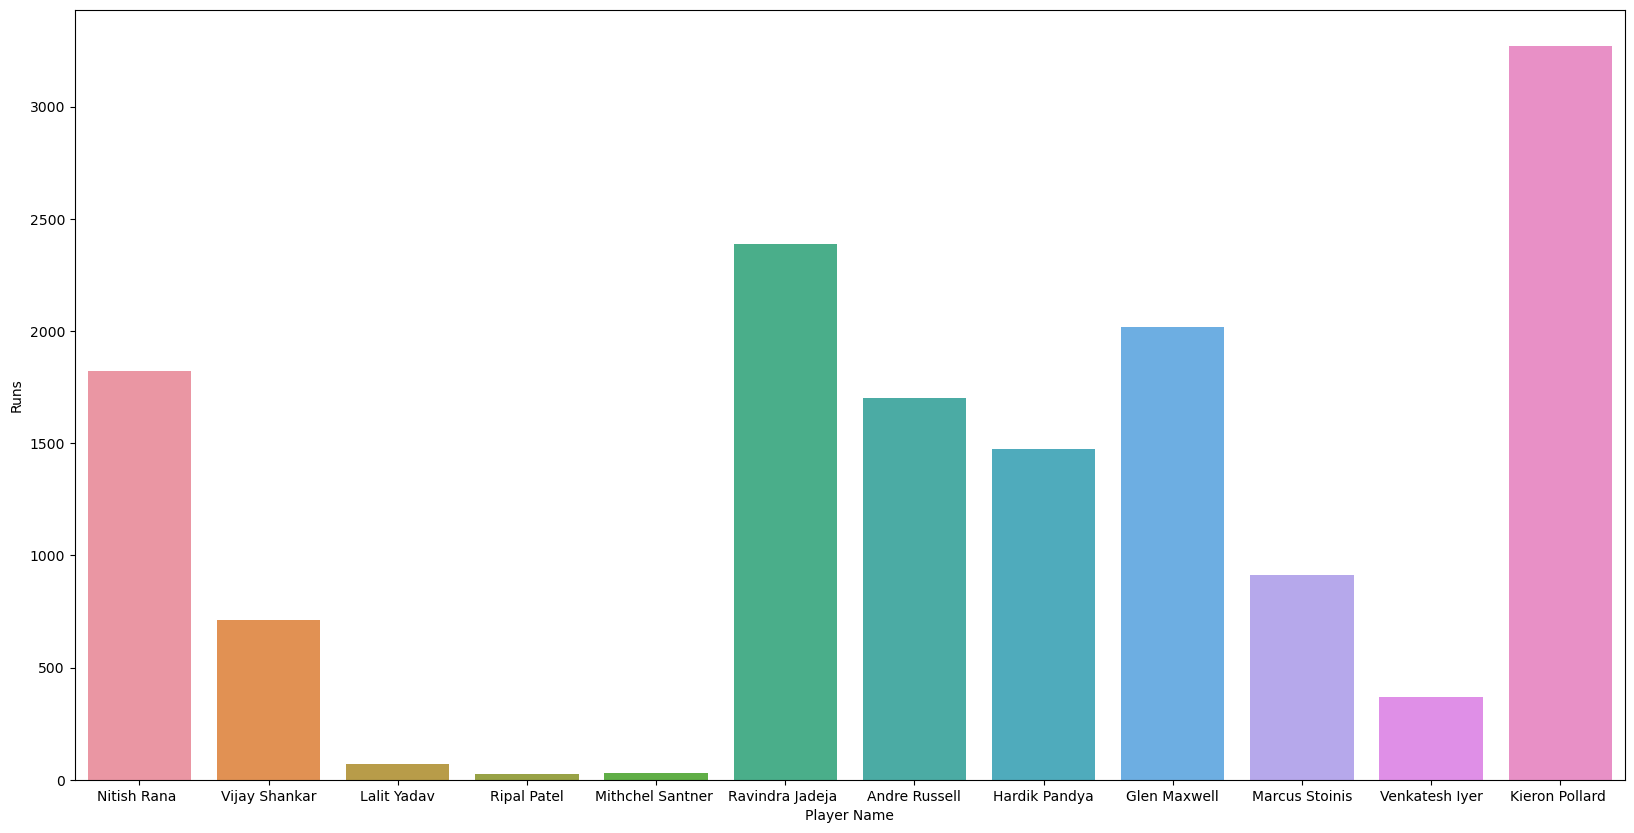

In [36]:
plt.figure(figsize =(20,10) )
sns.barplot(x ="Player Name" ,y = "Runs" , data = top_allrounders )
plt.show()

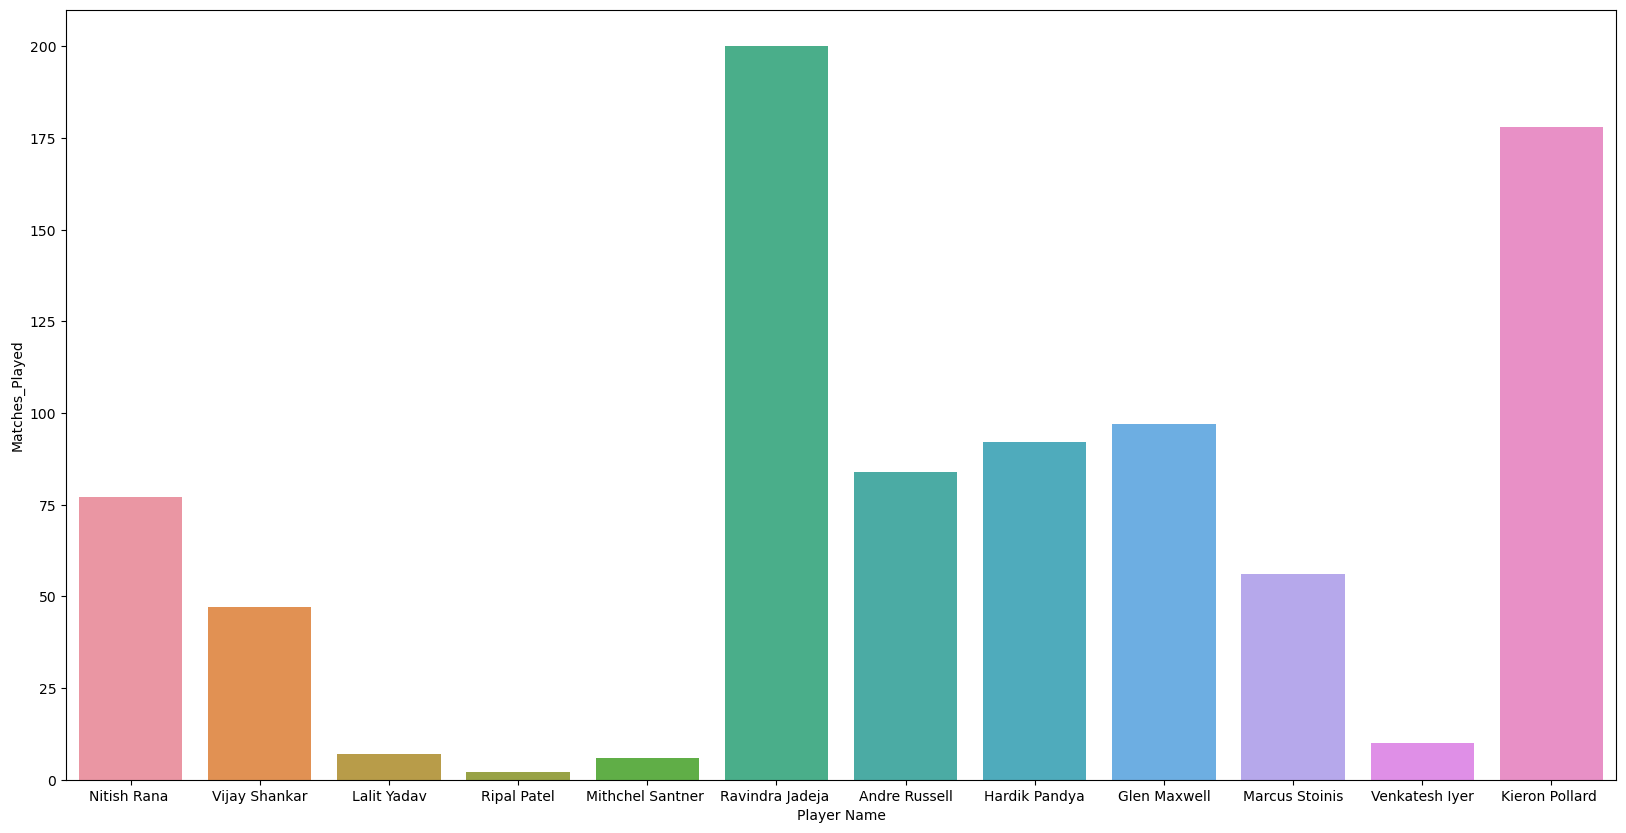

In [37]:
plt.figure(figsize =(20,10) )
sns.barplot(x ="Player Name" ,y = "Matches_Played" , data = top_allrounders)
plt.show()

### Visualization of Keepers

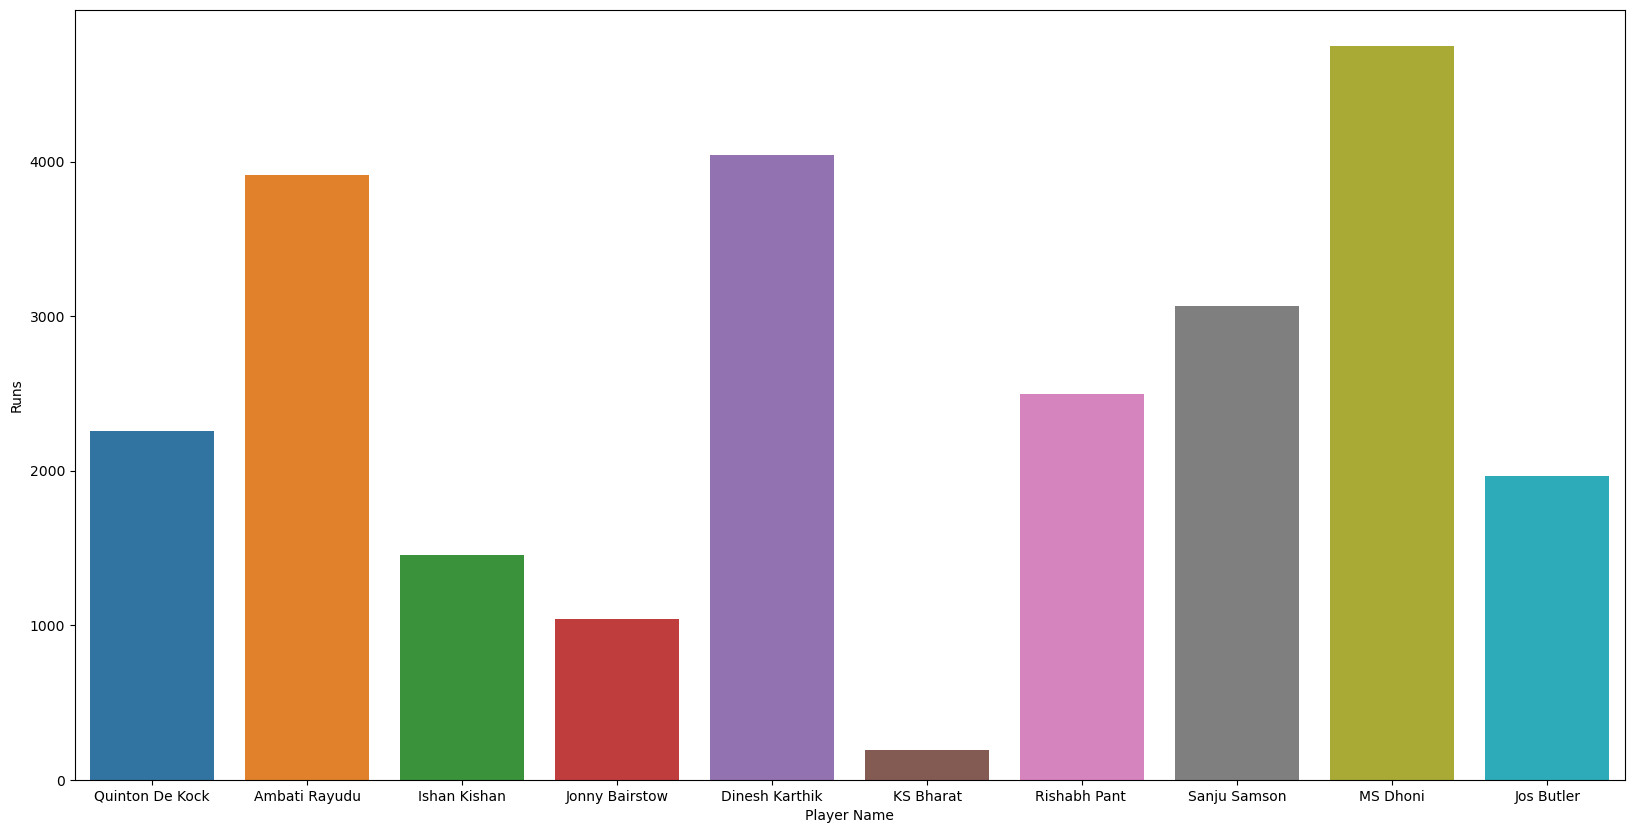

In [38]:
plt.figure(figsize =(20,10))
sns.barplot(x = "Player Name" , y ="Runs" ,data = top_keepers)
plt.show()

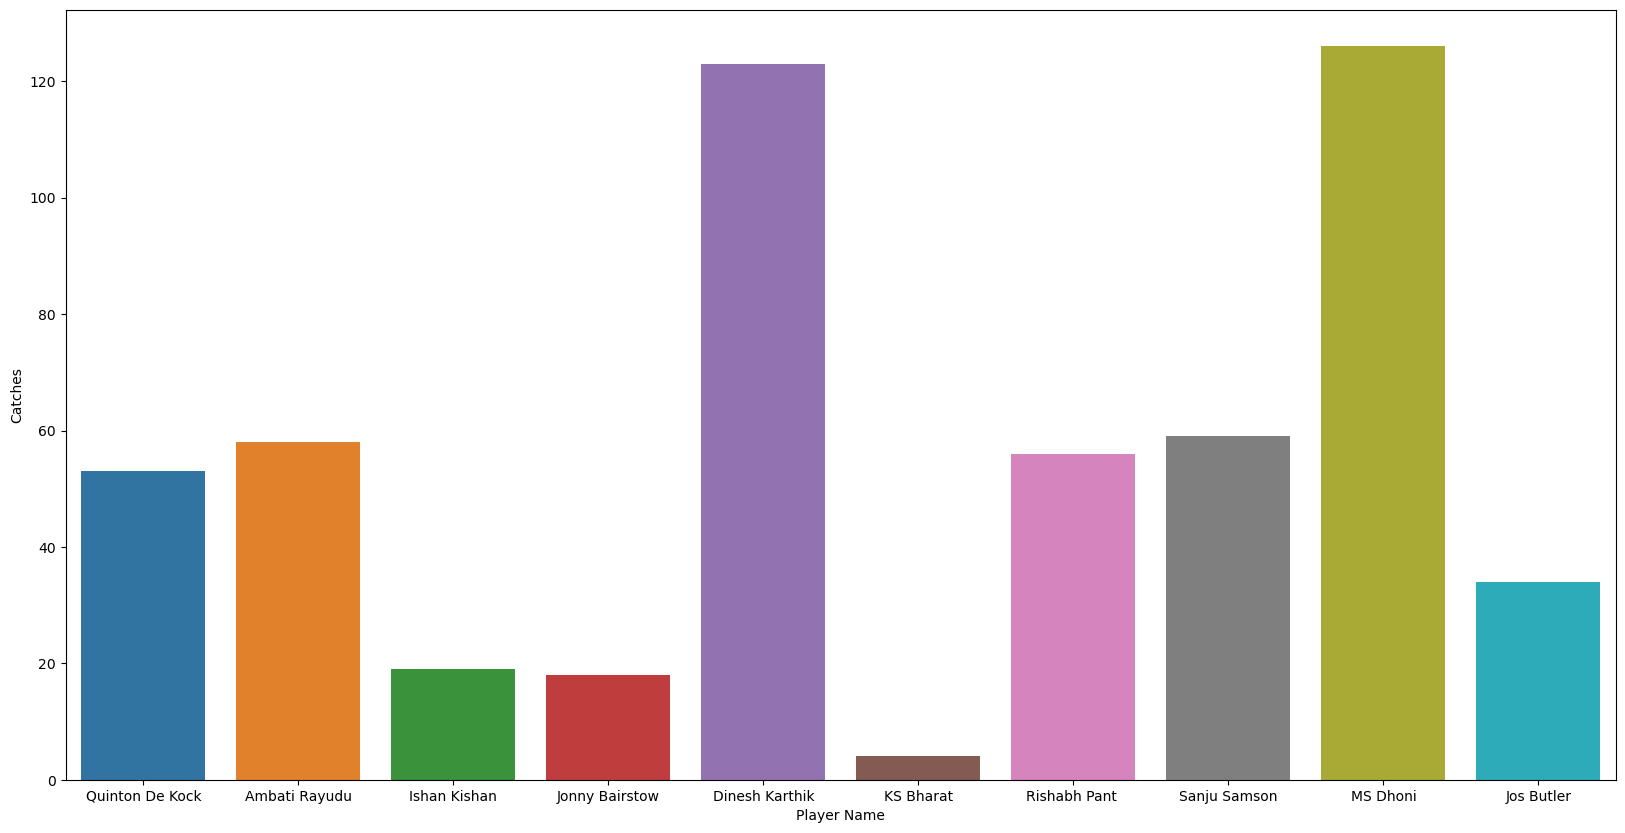

In [39]:
plt.figure(figsize =(20,10))
sns.barplot(x = "Player Name" , y ="Catches" ,data = top_keepers)
plt.show()

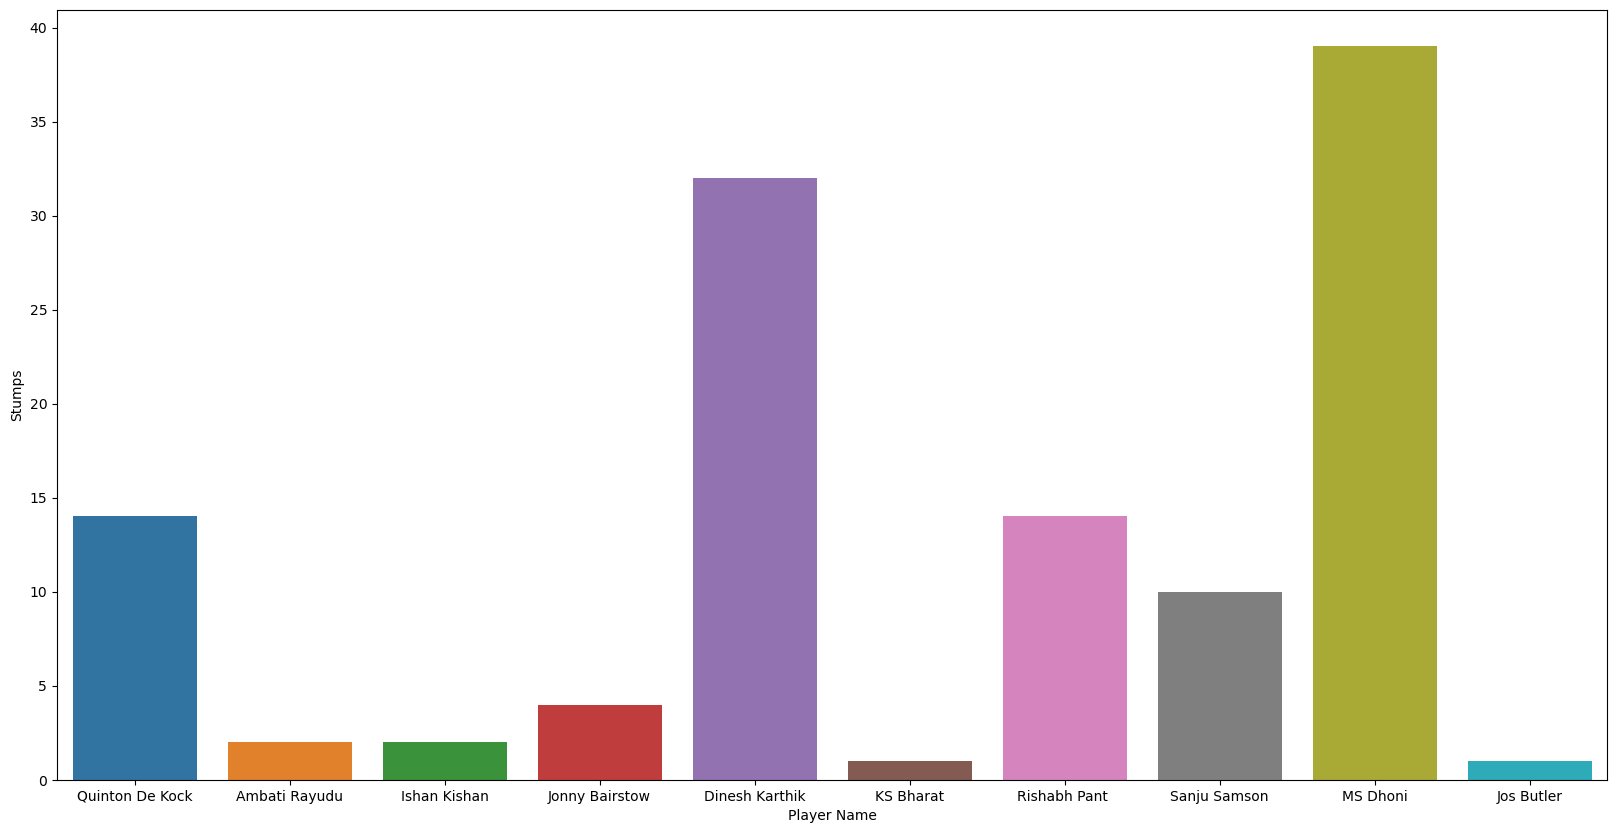

In [40]:
plt.figure(figsize =(20,10))
sns.barplot(x = "Player Name" , y ="Stumps" ,data = top_keepers)
plt.show()

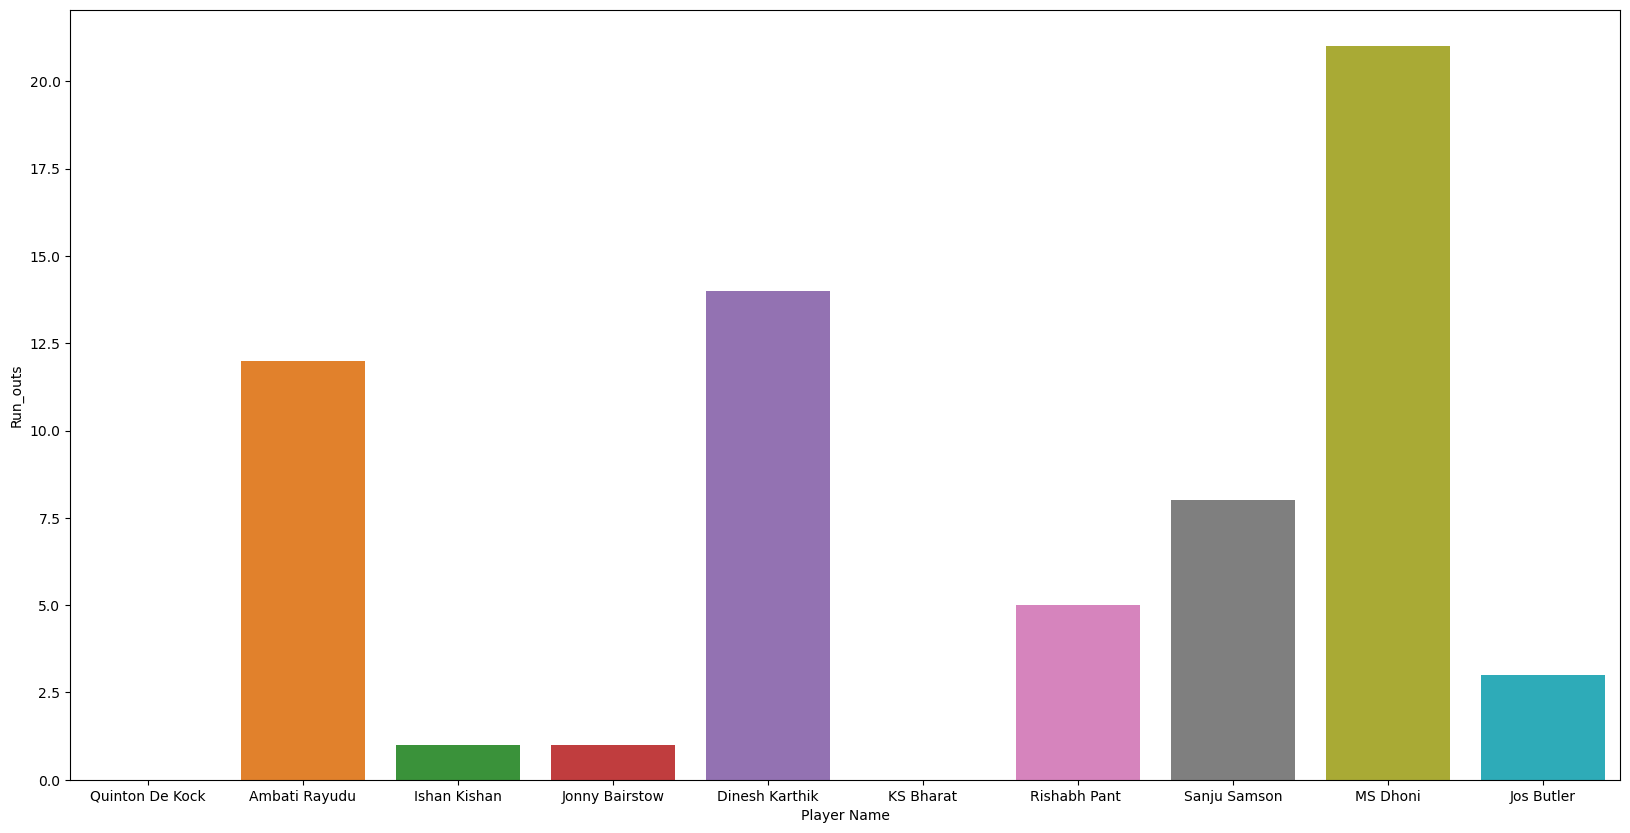

In [41]:
plt.figure(figsize =(20,10))
sns.barplot(x = "Player Name" , y ="Run_outs" ,data = top_keepers)
plt.show()

 Firstly reset the indexes of the Dataframe for the ease of access 
 iloc is a method used to access multiple rows and columns 

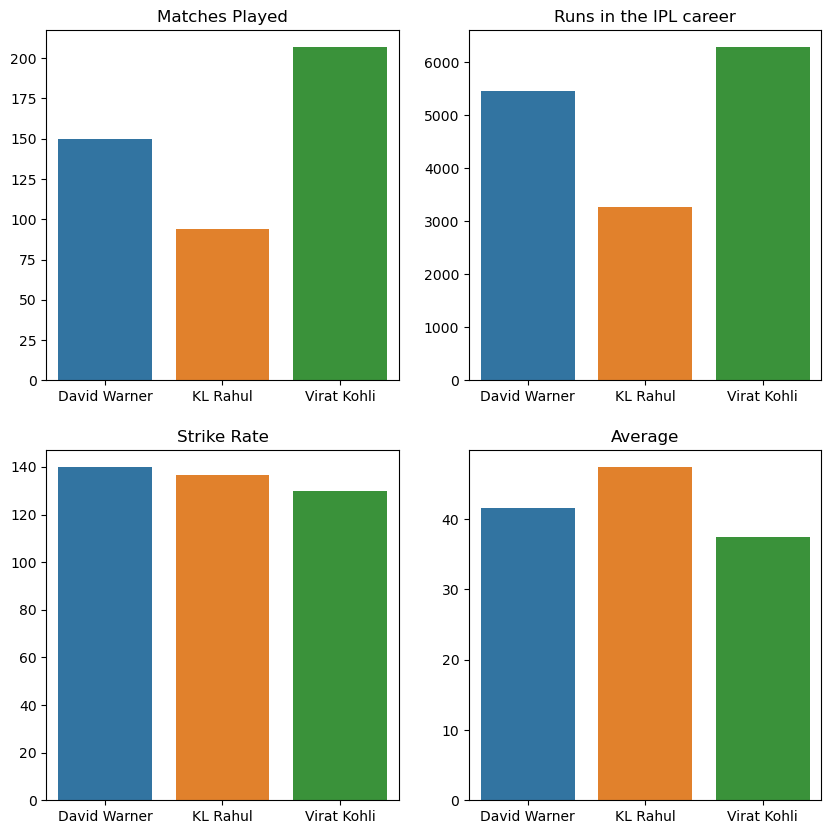

In [42]:
# Resetting the index of the 'top_batters' DataFrame, dropping the previous index
top_batters.reset_index(drop=True)

# Extracting specific values for plotting
matches_values = [top_batters.iloc[2]["Matches_Played"], top_batters.iloc[6]["Matches_Played"], top_batters.iloc[5]["Matches_Played"]]
runs_values = [top_batters.iloc[2]["Runs"], top_batters.iloc[6]["Runs"], top_batters.iloc[5]["Runs"]]
average_values = [top_batters.iloc[2]["Average"], top_batters.iloc[6]["Average"], top_batters.iloc[5]["Average"]]
strike_rate_values = [top_batters.iloc[2]["Strike_Rate"], top_batters.iloc[6]["Strike_Rate"], top_batters.iloc[5]["Strike_Rate"]]

# Labels for the bar plots
labels = ["David Warner", "KL Rahul", "Virat Kohli"]

# Creating subplots for visualizing different statistics
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0].set_title("Matches Played")
axes[0][1].set_title("Runs in the IPL career")
axes[1][0].set_title("Strike Rate")
axes[1][1].set_title("Average")

# Bar plots using seaborn
sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=labels, y=strike_rate_values, ax=axes[1][0])
sns.barplot(x=labels, y=average_values, ax=axes[1][1])

# Displaying the plots
plt.show()



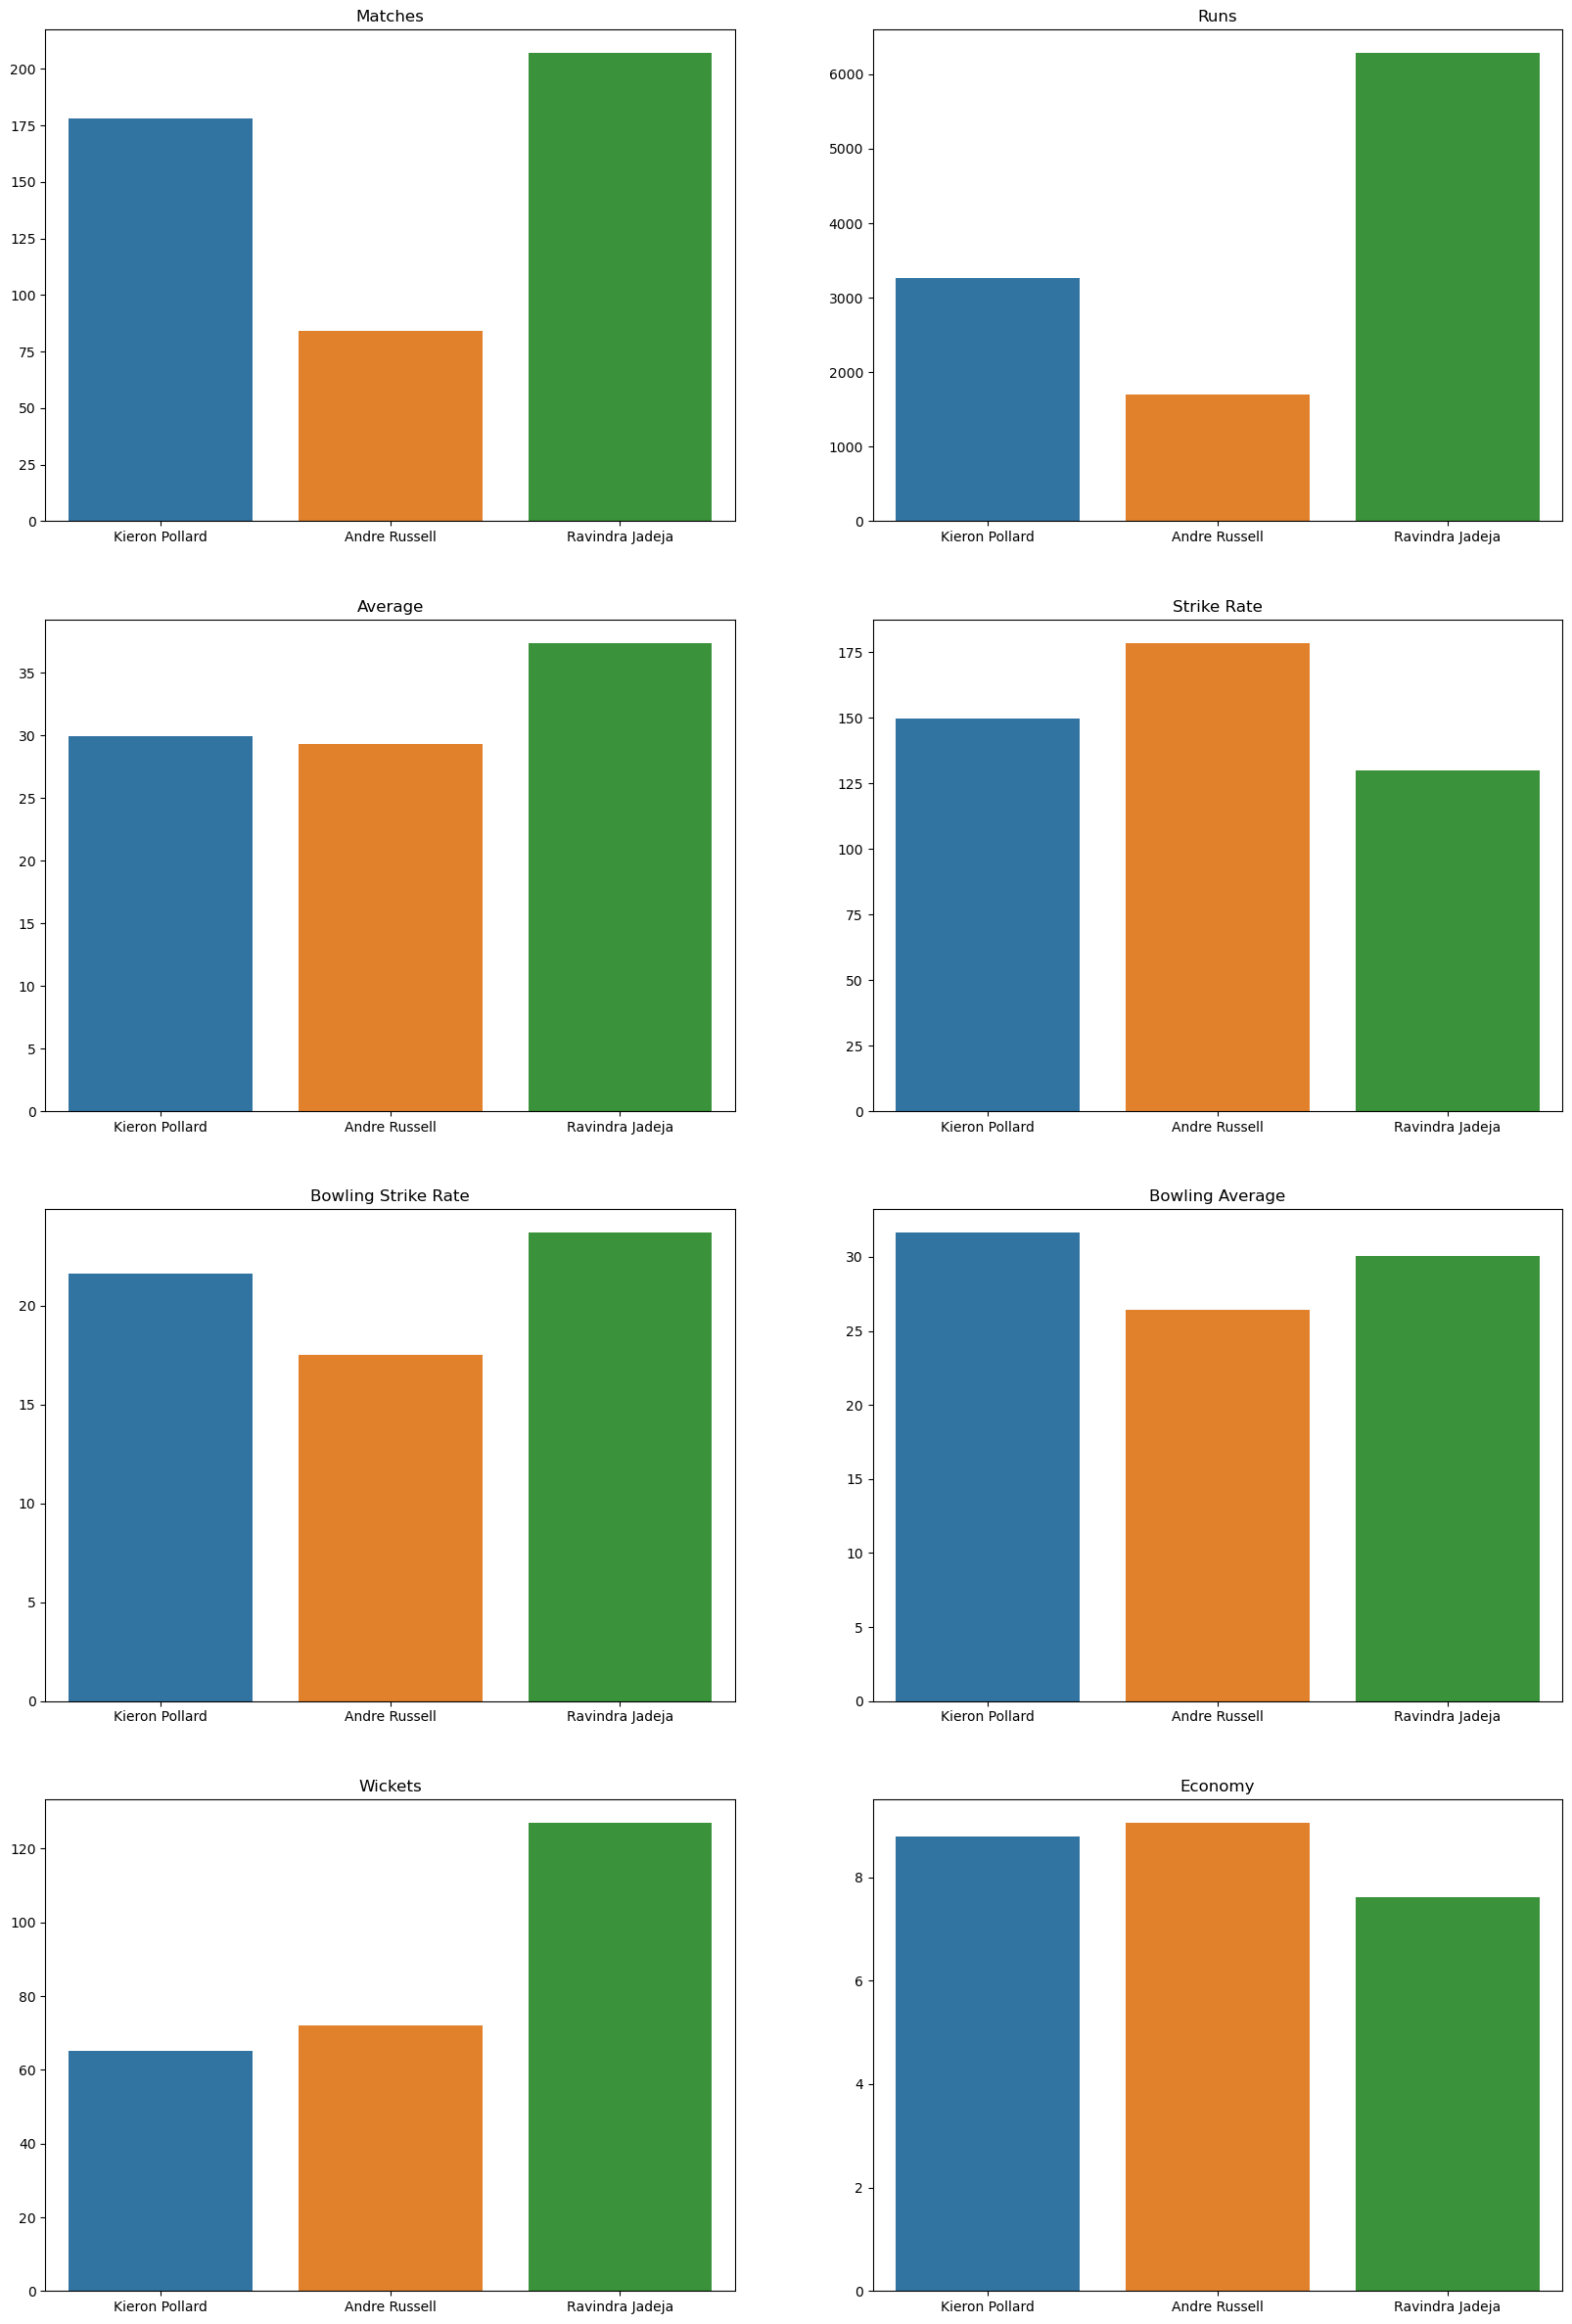

In [43]:
# Resetting the index of the 'top_allrounders' DataFrame, dropping the previous index
top_allrounders.reset_index(drop=True)

# Extracting specific values for plotting
matches_values = [top_allrounders.iloc[11]["Matches_Played"], top_allrounders.iloc[6]["Matches_Played"], top_batters.iloc[5]["Matches_Played"]]
runs_values = [top_allrounders.iloc[11]["Runs"], top_allrounders.iloc[6]["Runs"], top_batters.iloc[5]["Runs"]]
average_values = [top_allrounders.iloc[11]["Average"], top_allrounders.iloc[6]["Average"], top_batters.iloc[5]["Average"]]
strike_rate_values = [top_allrounders.iloc[11]["Strike_Rate"], top_allrounders.iloc[6]["Strike_Rate"], top_batters.iloc[5]["Strike_Rate"]]
bowling_sr_values = [top_allrounders.iloc[11]["Bowling_Strike_Rate"], top_allrounders.iloc[6]["Bowling_Strike_Rate"], top_allrounders.iloc[5]["Bowling_Strike_Rate"]]
bowling_average_values = [top_allrounders.iloc[11]["Bowling_average"], top_allrounders.iloc[6]["Bowling_average"], top_allrounders.iloc[5]["Bowling_average"]]
wickets_values = [top_allrounders.iloc[11]["Wickets"], top_allrounders.iloc[6]["Wickets"], top_allrounders.iloc[5]["Wickets"]]
economy_values = [top_allrounders.iloc[11]["Economy"], top_allrounders.iloc[6]["Economy"], top_allrounders.iloc[5]["Economy"]]

# Labels for the bar plots
labels = ["Kieron Pollard", "Andre Russell", "Ravindra Jadeja"]

# Creating subplots for visualizing different statistics
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Runs")
axes[1][0].set_title("Average")
axes[1][1].set_title("Strike Rate")
axes[2][0].set_title("Bowling Strike Rate")
axes[2][1].set_title("Bowling Average")
axes[3][0].set_title("Wickets")
axes[3][1].set_title("Economy")

# Bar plots using seaborn
sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=runs_values, ax=axes[0][1])
sns.barplot(x=labels, y=average_values, ax=axes[1][0])
sns.barplot(x=labels, y=strike_rate_values, ax=axes[1][1])
sns.barplot(x=labels, y=bowling_sr_values, ax=axes[2][0])
sns.barplot(x=labels, y=bowling_average_values, ax=axes[2][1])
sns.barplot(x=labels, y=wickets_values, ax=axes[3][0])
sns.barplot(x=labels, y=economy_values, ax=axes[3][1])

# Displaying the plots
plt.show()


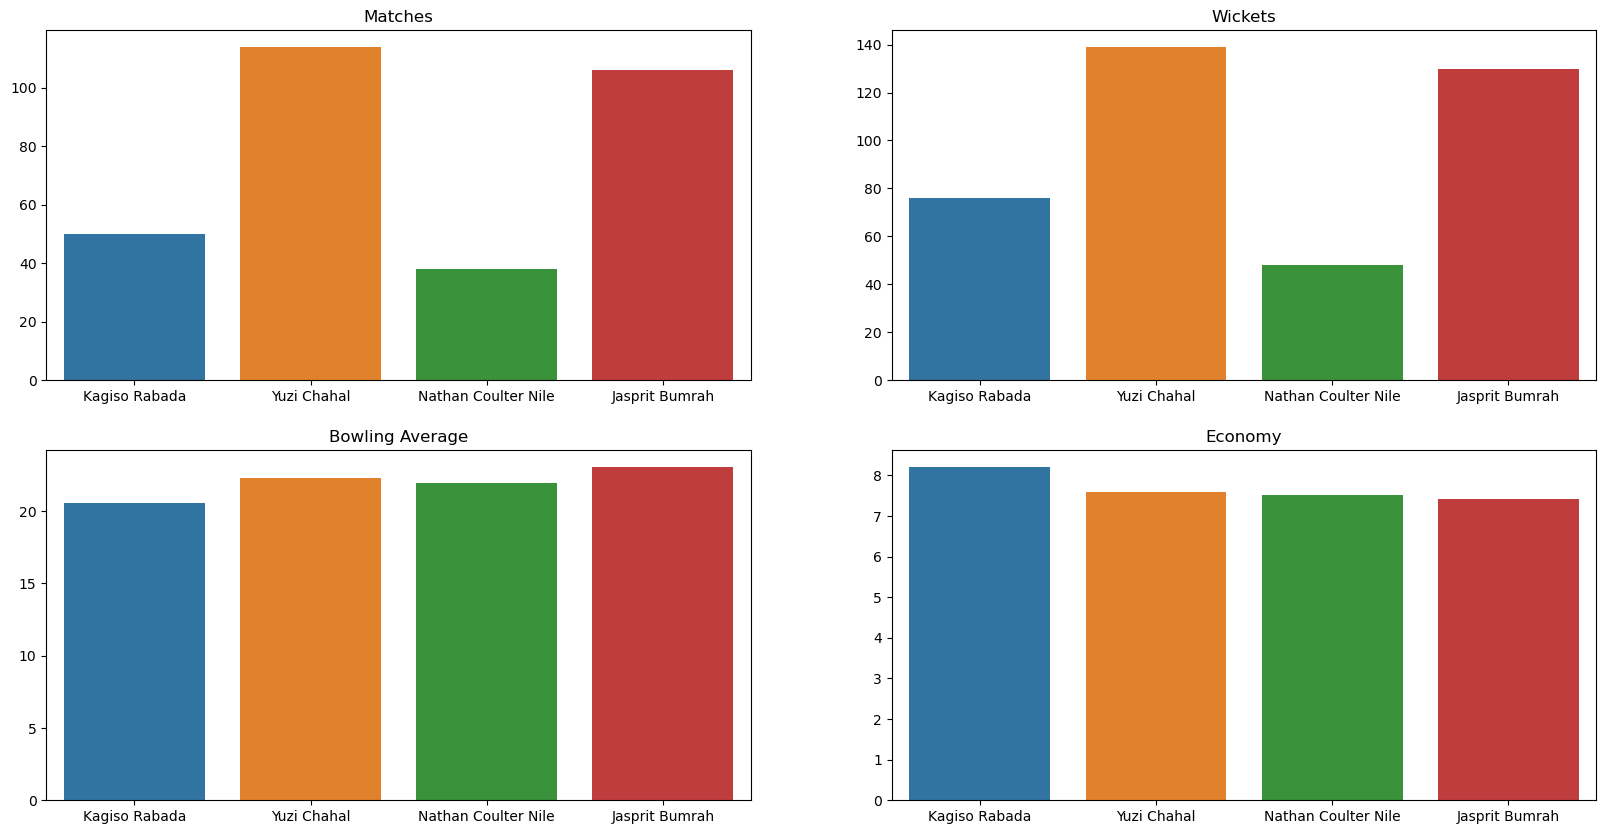

In [44]:
# Resetting the index of the 'top_bowlers' DataFrame, dropping the previous index
top_bowlers.reset_index(drop=True)

# Extracting specific values for plotting
matches_values = [top_bowlers.iloc[0]["Matches_Played"], top_bowlers.iloc[1]["Matches_Played"], top_bowlers.iloc[4]["Matches_Played"], top_bowlers.iloc[7]["Matches_Played"]]
wickets_values = [top_bowlers.iloc[0]["Wickets"], top_bowlers.iloc[1]["Wickets"], top_bowlers.iloc[4]["Wickets"], top_bowlers.iloc[7]["Wickets"]]
bowling_average_values = [top_bowlers.iloc[0]["Bowling_average"], top_bowlers.iloc[1]["Bowling_average"], top_bowlers.iloc[4]["Bowling_average"], top_bowlers.iloc[7]["Bowling_average"]]
economy_values = [top_bowlers.iloc[0]["Economy"], top_bowlers.iloc[1]["Economy"], top_bowlers.iloc[4]["Economy"], top_bowlers.iloc[7]["Economy"]]

# Labels for the bar plots
labels = ["Kagiso Rabada", "Yuzi Chahal", "Nathan Coulter Nile", "Jasprit Bumrah"]

# Creating subplots for visualizing different statistics
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes[0][0].set_title("Matches")
axes[0][1].set_title("Wickets")
axes[1][0].set_title("Bowling Average")
axes[1][1].set_title("Economy")

# Bar plots using seaborn
sns.barplot(x=labels, y=matches_values, ax=axes[0][0])
sns.barplot(x=labels, y=wickets_values, ax=axes[0][1])
sns.barplot(x=labels, y=bowling_average_values, ax=axes[1][0])
sns.barplot(x=labels, y=economy_values, ax=axes[1][1])

# Displaying the plots
plt.show()


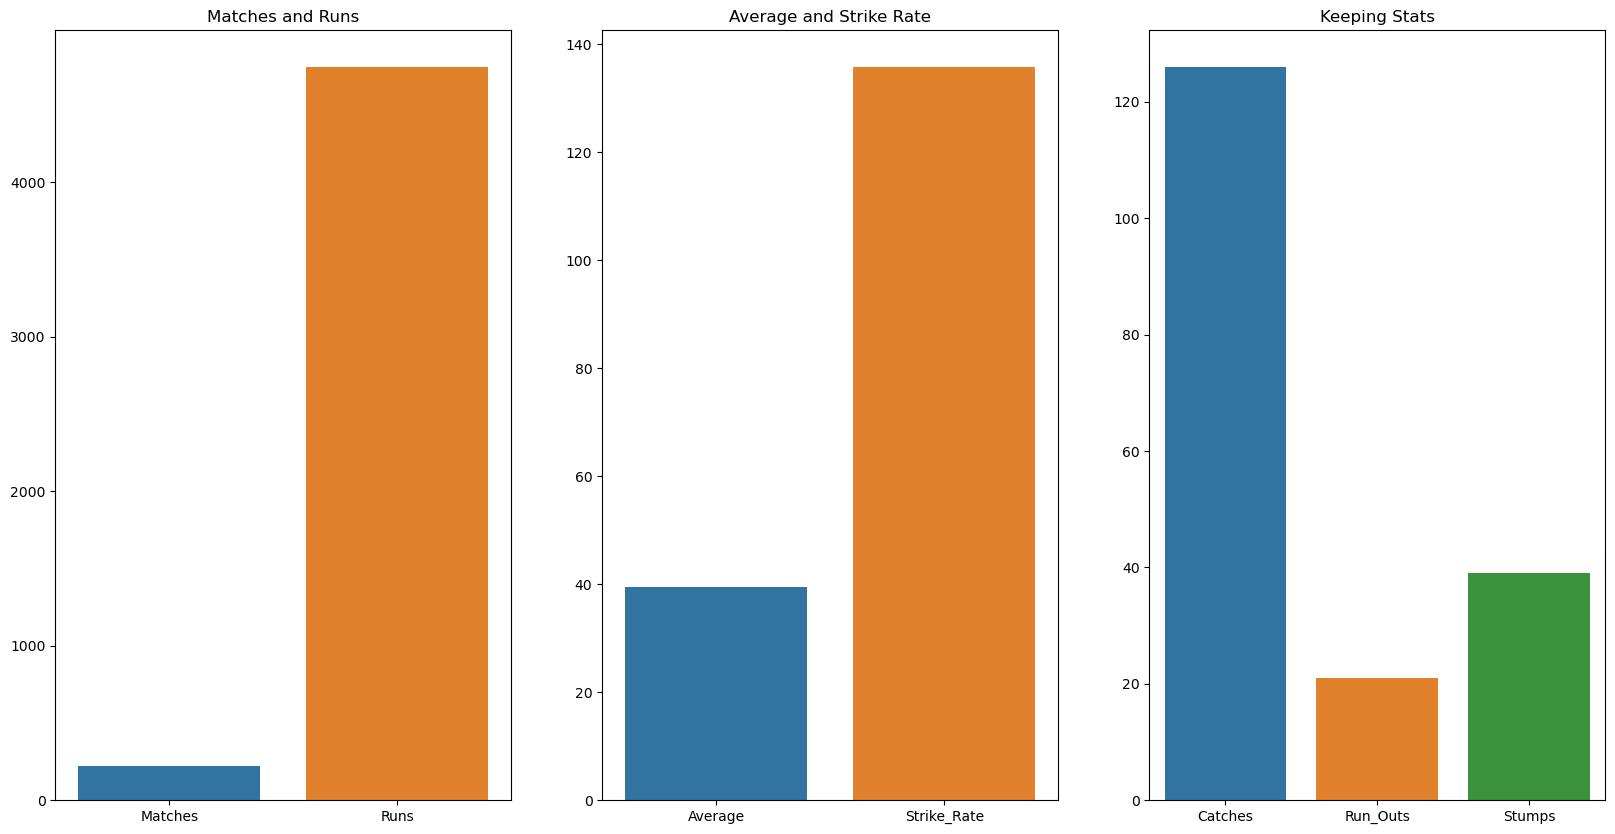

In [45]:
# Resetting the index of the 'top_keepers' DataFrame, dropping the previous index
top_keepers.reset_index(drop=True)

# Extracting specific values for plotting
matches_values = [top_keepers.iloc[8]["Matches_Played"], top_keepers.iloc[8]["Runs"]]
average_values = [top_keepers.iloc[8]["Average"], top_keepers.iloc[8]["Strike_Rate"]]
keeping_values = [top_keepers.iloc[8]["Catches"], top_keepers.iloc[8]["Run_outs"], top_keepers.iloc[8]["Stumps"]]

# Labels for the bar plots
labels1 = ["Matches", "Runs"]
labels2 = ["Average", "Strike_Rate"]
labels3 = ["Catches", "Run_Outs", "Stumps"]

# Creating subplots for visualizing different statistics
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].set_title("Matches and Runs")
axes[1].set_title("Average and Strike Rate")
axes[2].set_title("Keeping Stats")

# Bar plots using seaborn
sns.barplot(x=labels1, y=matches_values, ax=axes[0])
sns.barplot(x=labels2, y=average_values, ax=axes[1])
sns.barplot(x=labels3, y=keeping_values, ax=axes[2])

# Displaying the plots
plt.show()


### So these are the final 11 best players analyzed from the IPL Action Dataset for the next upcoming "World Cup"
 #### 1. Batters :- [ " Virat Kohli "," David Warner "," KL Rahul " ]
 #### 2. All rounders :- [ " Kieron Pollard ","  Ravindra Jadeja ","  Andre Russell " ]
 #### 3. Bowlers :- [" Kagiso Rabada "," Yuzi Chahal "," Nathan Coulter Nile "," Jasprit Bumrah" ]
 #### 4. Keeper :- [ " Mahendra Singh Dhoni  " ] (one and only)